english version: https://bit.ly/2yWgCE7 

Dataset  disponibilizado por: [CSSEGISandData](https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series)

atualizado dia: 17/04/20

# Changelog

controle de versões pelo GIT, clicar no numero da versao levara ao repositorio correspondente a ela

---


v1.0 

*   Versão inicial



[v1.0.1](https://github.com/Luscahm/covid_prediction/tree/V1.0.1)


*   Correção de bugs   

[v1.1](https://github.com/Luscahm/covid_prediction/tree/v1.1.x) 
*   Melhora na previsão de casos e mortes no Brasil
*   Textos traduzidos para o ingles(link acima)
*   Imports desnecessarios foram excluidos
*   Correção de bugs

[v2.0](https://github.com/Luscahm/covid_prediction/tree/v2.0.x)
*   Melhora em alguns graficos
*   Novos Graficos
*   Melhora nas tabelas de apresentação de resultado
*   Melhora na previsão de casos e mortes nos EUA
*   Adicionada seção "Sobre Mim"


In [0]:
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import itertools    

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error


plt.style.use('seaborn-darkgrid')

# Leitura de Dados

---



Nessa parte serão realizados os seguintes passos:


*   Transformar os csv disponivel no Git em um dataframe do pandas
*   Separar em  4 dataframes diferentes: 
      1.   Brasil
      2.   Estados Unidos
      3.   Suécia
      4.   Itália


*   Remover partes do dataframe que não serão usadas
*   iremos utilizar 3 dataframe para cada país: Confirmados, Mortes e Recuperados








In [0]:
url_confirmados = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
url_mortes = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"
url_recuperados = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv"
df_confirmados = pd.read_csv(url_confirmados)
df_mortes = pd.read_csv(url_mortes)
df_recuperados = pd.read_csv(url_recuperados)

In [0]:
df_confirmados.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,444,484,521,555,607,665,714,784,840,906
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,400,409,416,433,446,467,475,494,518,539
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,1572,1666,1761,1825,1914,1983,2070,2160,2268,2418
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,564,583,601,601,638,646,659,673,673,696
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,19,19,19,19,19,19,19,19,19,19


In [0]:
# Separing in locals dataframes

df_confirmados_brasil = df_confirmados.loc[df_confirmados['Country/Region'] == 'Brazil'].copy()
df_confirmados_italia = df_confirmados.loc[df_confirmados['Country/Region'] == 'Italy'].copy()
df_confirmados_eua = df_confirmados.loc[df_confirmados['Country/Region'] == 'US'].copy()
df_confirmados_suecia = df_confirmados.loc[df_confirmados['Country/Region'] == 'Sweden'].copy()
#-----------------------------------------------------------------------------------------------
df_mortes_brasil = df_mortes.loc[df_mortes['Country/Region'] == 'Brazil'].copy()
df_mortes_italia = df_mortes.loc[df_mortes['Country/Region'] == 'Italy'].copy()
df_mortes_eua = df_mortes.loc[df_mortes['Country/Region'] == 'US'].copy()
df_mortes_suecia = df_mortes.loc[df_mortes['Country/Region'] == 'Sweden'].copy()
#-----------------------------------------------------------------------------------------------
df_recuperados_brasil = df_recuperados.loc[df_recuperados['Country/Region'] == 'Brazil'].copy()
df_recuperados_italia = df_recuperados.loc[df_recuperados['Country/Region'] == 'Italy'].copy()
df_recuperados_eua = df_recuperados.loc[df_recuperados['Country/Region'] == 'US'].copy()
df_recuperados_suecia = df_recuperados.loc[df_recuperados['Country/Region'] == 'Sweden'].copy()

In [0]:
df_confirmados_brasil.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20
28,NaN,Brazil,-14.235,-51.9253,0,0,0,0,0,0,...,16170,18092,19638,20727,22192,23430,25262,28320,30425,33682


In [0]:
df_confirmados_italia.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20
137,NaN,Italy,43.0,12.0,0,0,0,0,0,0,...,139422,143626,147577,152271,156363,159516,162488,165155,168941,172434


In [0]:
df_confirmados_eua.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20
225,NaN,US,37.0902,-95.7129,1,1,2,2,5,5,...,429052,461437,496535,526396,555313,580619,607670,636350,667801,699706


In [0]:
df_confirmados_suecia.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20
205,NaN,Sweden,63.0,16.0,0,0,0,0,0,0,...,8419,9141,9685,10151,10483,10948,11445,11927,12540,13216


In [0]:
# Fazendo com que todos os df comecem apenas 1 dia antes do 1º casi de covid 
df_confirmados_brasil = df_confirmados_brasil.iloc[:,39:]
df_confirmados_eua = df_confirmados_eua.iloc[:,4:]
df_confirmados_italia = df_confirmados_italia.iloc[:,12:]
df_confirmados_suecia = df_confirmados_suecia.iloc[:,13:]
# -------------------------------------------------------------
df_mortes_brasil = df_mortes_brasil.iloc[:,39:]
df_mortes_eua = df_mortes_eua.iloc[:,4:]
df_mortes_italia = df_mortes_italia.iloc[:,12:]
df_mortes_suecia = df_mortes_suecia.iloc[:,13:]
# -------------------------------------------------------------
df_recuperados_brasil = df_recuperados_brasil.iloc[:,39:]
df_recuperados_eua = df_recuperados_eua.iloc[:,4:]
df_recuperados_italia = df_recuperados_italia.iloc[:,12:]
df_recuperados_suecia = df_recuperados_suecia.iloc[:,13:]

# Tratando os dados



Tendo em vista que o algoritmo de aprendizado de maquina não aceita datas no formato MM/DD/AA, nos iremos realizar alguns tratamentos nesses dataframes para conseguir o que queremos, realizaremos os seguinte passos:


*   Extrairemos os index das colunas
*   Extrairemos os numeros de casos de cada país
*   transformaremos as datas em dias corridos, 1º dia do covid = 0, segundo = 1,etc..
*   Escolheremos em quantos dias corridos no futuro queremos fazer a predição
*   transformaremos os dias corridos em datas mm/dd/yy
*   Transpor todos os dataframes









In [0]:
# pegando o indice das colunas:
index_brasil = list(df_confirmados_brasil.columns.values) 
index_italia = list(df_confirmados_italia.columns.values) 
index_eua = list(df_confirmados_eua.columns.values) 
index_suecia = list(df_confirmados_suecia.columns.values) 

In [0]:
# pegando os valores de todos df do brasil para auxiliar em construções de graficos:
casos_brasil = []
mortes_brasil = []
recuperados_brasil = []
for i in index_brasil:
    confirmados_brasil = df_confirmados_brasil[i].sum()
    casos_brasil.append(confirmados_brasil)
    
    mortos_brasil = df_mortes_brasil[i].sum()
    mortes_brasil.append(mortos_brasil)
    
    recupera_brasil = df_recuperados_brasil[i].sum()
    recuperados_brasil.append(recupera_brasil)

In [0]:
# realizando o mesmo processo anterior para o eua
casos_eua = []
mortes_eua = []
recuperados_eua = []

for i in index_eua:
    confirmados_eua = df_confirmados_eua[i].sum()
    casos_eua.append(confirmados_eua)
    
    mortos_eua = df_mortes_eua[i].sum()
    mortes_eua.append(mortos_eua)

    recupera_eua = df_recuperados_eua[i].sum()
    recuperados_eua.append(recupera_eua)


In [0]:
# realizando o mesmo processo anterior para a italia
casos_italia = []
mortes_italia = []
recuperados_italia = []

for i in index_italia:

    confirmados_italia = df_confirmados_italia[i].sum()
    casos_italia.append(confirmados_italia)
    
    mortos_italia = df_mortes_italia[i].sum()
    mortes_italia.append(mortos_italia)
    
    recupera_italia = df_recuperados_italia[i].sum()
    recuperados_italia.append(recupera_italia)
   
    
    

In [0]:
# realizando o mesmo processo anterior para a suecia
casos_suecia  = []
mortes_suecia  = []
recuperados_suecia  = []
for i in index_suecia:
    confirmados_suecia = df_confirmados_suecia[i].sum()
    casos_suecia.append(confirmados_suecia)
    
    mortos_suecia = df_mortes_suecia[i].sum()
    mortes_suecia.append(mortos_suecia)

    recupera_suecia = df_recuperados_suecia[i].sum()
    recuperados_suecia.append(recupera_suecia)

In [0]:
# transformando as datas em um numpy array de dias corridos:
dias_brasil = np.array([i for i in range(len(index_brasil))]).reshape(-1, 1)
dias_eua = np.array([i for i in range(len(index_eua))]).reshape(-1, 1)
dias_italia = np.array([i for i in range(len(index_italia))]).reshape(-1, 1)
dias_suecia = np.array([i for i in range(len(index_suecia))]).reshape(-1, 1)

In [0]:
futuro = 40 # essa variavel define quantos dias para frente a partir de hoje queremos prever.
# fazendo  datas futuras em numpy array de dias corridos 
futuro_brasil = np.array([i for i in range(len(index_brasil) + futuro)]).reshape(-1, 1)
futuro_eua = np.array([i for i in range(len(index_eua) + futuro)]).reshape(-1, 1)
futuro_italia = np.array([i for i in range(len(index_italia) + futuro)]).reshape(-1, 1)
futuro_suecia = np.array([i for i in range(len(index_suecia) + futuro)]).reshape(-1, 1)

In [0]:
# transformando datas futuras corridas em datas de formato mm/dd/yy
start_br = '2/26/20'
start_br = datetime.datetime.strptime(start_br,"%m/%d/%y")
datas_futuras_br = []
for i in range(len(futuro_brasil)):
    datas_futuras_br.append((start_br + datetime.timedelta(days=i)).strftime('%m/%d/%y'))
#---------------------------------------------------------------------------------------------------
start_us = '1/22/20'
start_us = datetime.datetime.strptime(start_us,"%m/%d/%y")
datas_futuras_us = []
for i in range(len(futuro_eua)):
    datas_futuras_us.append((start_us + datetime.timedelta(days=i)).strftime('%m/%d/%y'))
#---------------------------------------------------------------------------------------------------
start_it = '1/30/20'
start_it = datetime.datetime.strptime(start_it,"%m/%d/%y")
datas_futuras_it = []
for i in range(len(futuro_italia)):
    datas_futuras_it.append((start_it + datetime.timedelta(days=i)).strftime('%m/%d/%y'))
#---------------------------------------------------------------------------------------------------
start_su = '1/31/20'
start_su = datetime.datetime.strptime(start_su,"%m/%d/%y")
datas_futuras_su = []
for i in range(len(futuro_suecia)):
    datas_futuras_su.append((start_su + datetime.timedelta(days=i)).strftime('%m/%d/%y'))

In [0]:
# transpondo todos os dataframes
df_confirmados_brasil = df_confirmados_brasil.T
df_confirmados_brasil['dates'] = index_brasil

df_mortes_brasil = df_mortes_brasil.T
df_mortes_brasil['dates'] = index_brasil

df_recuperados_brasil = df_recuperados_brasil.T
df_recuperados_brasil['dates'] = index_brasil

new_index_br = [x for x in range(len(index_brasil))]
#----------------------------------------------------
df_confirmados_eua = df_confirmados_eua.T
df_confirmados_eua['dates'] = index_eua

df_mortes_eua = df_mortes_eua.T
df_mortes_eua['dates'] = index_eua

df_recuperados_eua = df_recuperados_eua.T
df_recuperados_eua['dates'] = index_eua

new_index_eua = [x for x in range(len(index_eua))]
#----------------------------------------------------
df_confirmados_italia = df_confirmados_italia.T
df_confirmados_italia['dates'] = index_italia

df_mortes_italia = df_mortes_italia.T
df_mortes_italia['dates'] = index_italia

df_recuperados_italia = df_recuperados_italia.T
df_recuperados_italia['dates'] = index_italia

new_index_it = [x for x in range(len(index_italia))]
#----------------------------------------------------
df_confirmados_suecia = df_confirmados_suecia.T
df_confirmados_suecia['dates'] = index_suecia

df_mortes_suecia = df_mortes_suecia.T
df_mortes_suecia['dates'] = index_suecia

df_recuperados_suecia = df_recuperados_suecia.T
df_recuperados_suecia['dates'] = index_suecia
new_index_su = [x for x in range(len(index_suecia))]


In [0]:
df_confirmados_brasil.head()


,28,dates
2/26/20,1,2/26/20
2/27/20,1,2/27/20
2/28/20,1,2/28/20
2/29/20,2,2/29/20
3/1/20,2,3/1/20


In [0]:
# como vimos os index estão errados, iremos arrumar-los agora.
df_confirmados_brasil['index'] = new_index_br
df_confirmados_brasil = df_confirmados_brasil.set_index('index')
df_confirmados_brasil.rename(columns={28:'cases',
                   'dates':'dates'}, 
                 inplace=True)
df_confirmados_brasil.index.name = None
df_confirmados_brasil['dates'] = dias_brasil

df_mortes_brasil['index'] = new_index_br
df_mortes_brasil = df_mortes_brasil.set_index('index')
df_mortes_brasil.rename(columns={28:'deaths',
                   'dates':'dates'}, 
                 inplace=True)
df_mortes_brasil.index.name = None
df_mortes_brasil['dates'] = dias_brasil

df_recuperados_brasil['index'] = new_index_br
df_recuperados_brasil = df_recuperados_brasil.set_index('index')
df_recuperados_brasil.rename(columns={29:'recovery',
                   'dates':'dates'}, 
                 inplace=True)
df_recuperados_brasil.index.name = None
df_recuperados_brasil['dates'] = dias_brasil

#------------------------------------------------
df_confirmados_eua['index'] = new_index_eua
df_confirmados_eua = df_confirmados_eua.set_index('index')
df_confirmados_eua.rename(columns={225:'cases',
                   'dates':'dates'}, 
                 inplace=True)
df_confirmados_eua.index.name = None
df_confirmados_eua['dates'] = dias_eua

df_mortes_eua['index'] = new_index_eua
df_mortes_eua = df_mortes_eua.set_index('index')
df_mortes_eua.rename(columns={225:'deaths',
                   'dates':'dates'}, 
                 inplace=True)
df_mortes_eua.index.name = None
df_mortes_eua['dates'] = dias_eua

df_recuperados_eua['index'] = new_index_eua
df_recuperados_eua = df_recuperados_eua.set_index('index')
df_recuperados_eua.rename(columns={225:'recovery',
                   'dates':'dates'}, 
                 inplace=True)
df_recuperados_eua.index.name = None
df_recuperados_eua['dates'] = dias_eua
#------------------------------------------------
df_confirmados_italia['index'] = new_index_it
df_confirmados_italia = df_confirmados_italia.set_index('index')
df_confirmados_italia.rename(columns={137:'cases',
                   'dates':'dates'}, 
                 inplace=True)
df_confirmados_italia.index.name = None
df_confirmados_italia['dates'] = dias_italia

df_mortes_italia['index'] = new_index_it
df_mortes_italia = df_mortes_italia.set_index('index')
df_mortes_italia.rename(columns={137:'deaths',
                   'dates':'dates'}, 
                 inplace=True)
df_mortes_italia.index.name = None
df_mortes_italia['dates'] = dias_italia

df_recuperados_italia['index'] = new_index_it
df_recuperados_italia = df_recuperados_italia.set_index('index')
df_recuperados_italia.rename(columns={131:'recovery',
                   'dates':'dates'}, 
                 inplace=True)
df_recuperados_italia.index.name = None
df_recuperados_italia['dates'] = dias_italia
#------------------------------------------------
df_confirmados_suecia['index'] = new_index_su
df_confirmados_suecia = df_confirmados_suecia.set_index('index')
df_confirmados_suecia.rename(columns={205:'cases',
                   'dates':'dates'}, 
                 inplace=True)
df_confirmados_suecia.index.name = None
df_confirmados_suecia['dates'] = dias_suecia

df_mortes_suecia['index'] = new_index_su
df_mortes_suecia = df_mortes_suecia.set_index('index')
df_mortes_suecia.rename(columns={205:'deaths',
                   'dates':'dates'}, 
                 inplace=True)
df_mortes_suecia.index.name = None
df_mortes_suecia['dates'] = dias_suecia

df_recuperados_suecia['index'] = new_index_su
df_recuperados_suecia = df_recuperados_suecia.set_index('index')
df_recuperados_suecia.rename(columns={203:'recovery',
                   'dates':'dates'}, 
                 inplace=True)
df_recuperados_suecia.index.name = None
df_recuperados_suecia['dates'] = dias_suecia

abaixo, visualizaremos os dataframes transposto

In [0]:
df_confirmados_brasil.head()

,cases,dates
0,1,0
1,1,1
2,1,2
3,2,3
4,2,4


In [0]:
df_mortes_eua.head()

,deaths,dates
0,0,0
1,0,1
2,0,2
3,0,3
4,0,4


In [0]:
df_recuperados_suecia.head()

,recovery,dates
0,0,0
1,0,1
2,0,2
3,0,3
4,0,4


In [0]:
df_mortes_italia.head()

,deaths,dates
0,0,0
1,0,1
2,0,2
3,0,3
4,0,4


a parte de separar target de dados, e de separar em train e test será feita na secao de predicao

# Apresentação de Graficos

Nessa seção apenas sera apresentados alguns graficos que nos ajudara a entender como anda a situacao do covid-19 nos 4 paises selecionados

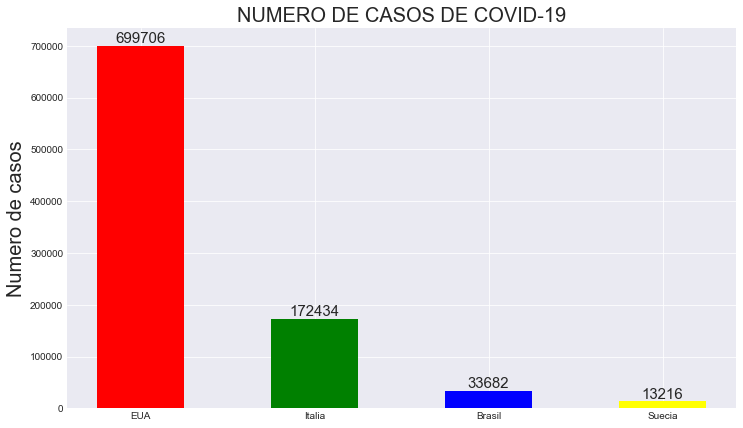

In [0]:

fig = plt.figure(figsize=(12, 7))
paises = ['EUA', 'Italia', 'Brasil', 'Suecia']
numeros = [confirmados_eua,confirmados_italia,confirmados_brasil,confirmados_suecia]
rects = plt.bar(paises,numeros, align='center', color=['red', 'green', 'blue', 'yellow'], width=0.5)

ax = rects.patches
for rect, label in zip(ax, numeros):
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height + 5, label,
            ha='center', va='bottom', fontsize=15)
    
plt.ylabel('Numero de casos', size = 20)
plt.title('NUMERO DE CASOS DE COVID-19', size=20)
plt.show()

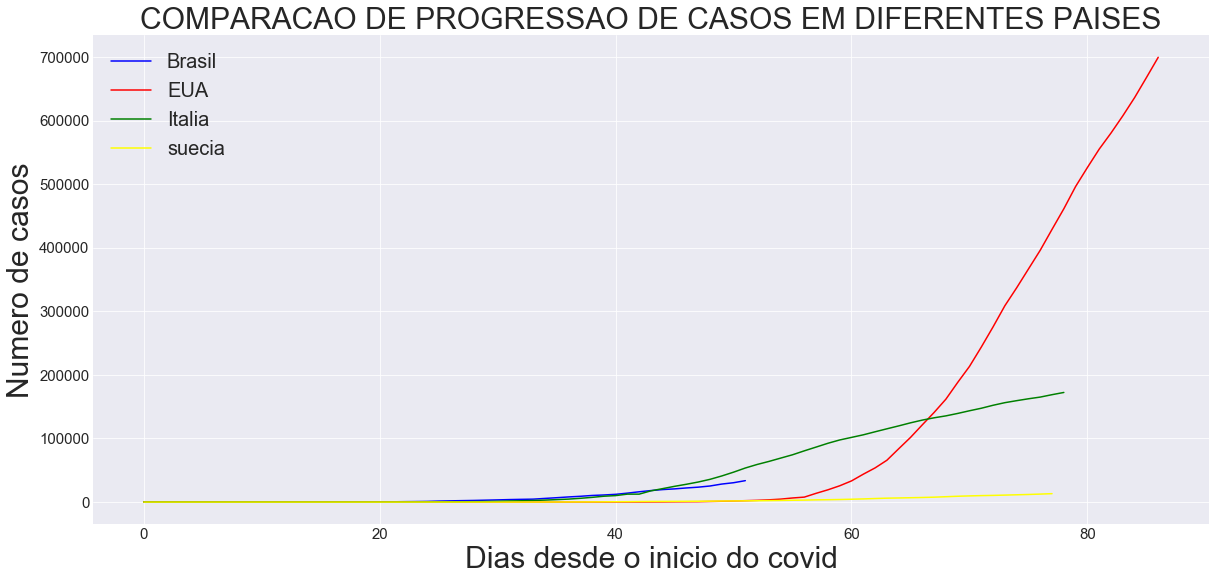

In [0]:
plt.figure(figsize=(20, 9))
plt.plot(dias_brasil, casos_brasil, color='blue')
plt.plot(dias_eua, casos_eua, color='red')
plt.plot(dias_italia, casos_italia, color='green')
plt.plot(dias_suecia, casos_suecia, color='yellow')

plt.title('COMPARACAO DE PROGRESSAO DE CASOS EM DIFERENTES PAISES', size=30)
plt.xlabel('Dias desde o inicio do covid', size = 30)
plt.ylabel('Numero de casos', size = 30)
plt.legend(['Brasil', 'EUA','Italia', 'suecia'],  prop={'size': 20}, loc="upper left")


plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


A suecia parece quase que uma linha reta ao se comparar com EUA e italia, a frente iremos comparar esses paises 2 a 2

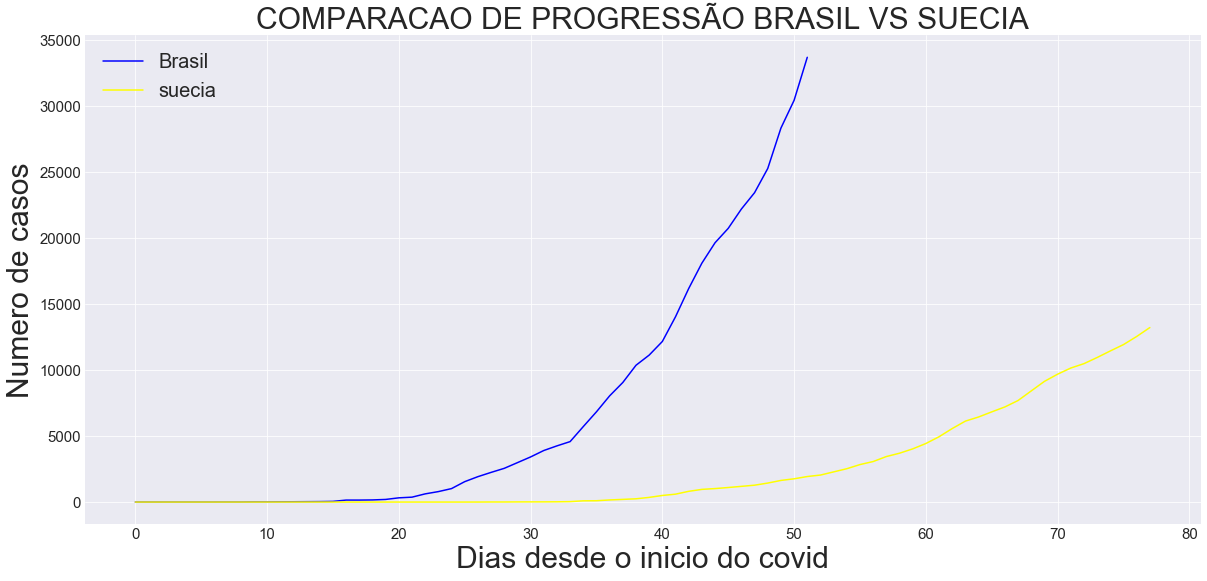

In [0]:
plt.figure(figsize=(20, 9))
plt.plot(dias_brasil, casos_brasil, color='blue')
plt.plot(dias_suecia, casos_suecia, color='yellow')


plt.title('COMPARACAO DE PROGRESSÃO BRASIL VS SUECIA', size=30)
plt.xlabel('Dias desde o inicio do covid', size = 30)
plt.ylabel('Numero de casos', size = 30)
plt.legend(['Brasil', 'suecia'],  prop={'size': 20}, loc="upper left")


plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


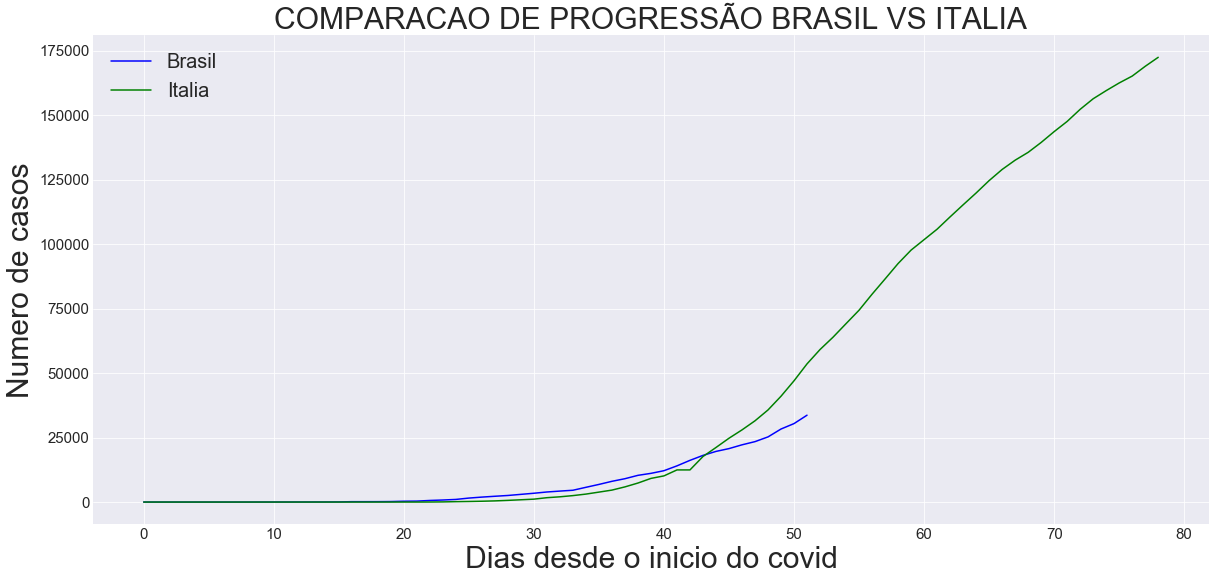

In [0]:
plt.figure(figsize=(20, 9))
plt.plot(dias_brasil, casos_brasil, color='blue')
plt.plot(dias_italia, casos_italia, color='green')


plt.title('COMPARACAO DE PROGRESSÃO BRASIL VS ITALIA', size=30)
plt.xlabel('Dias desde o inicio do covid', size = 30)
plt.ylabel('Numero de casos', size = 30)
plt.legend(['Brasil', 'Italia'],  prop={'size': 20}, loc="upper left")


plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


Nao podemos esquecer que o brasil tem populacao maior que a da italia, para numeros reais precisariamos do percentual, que sera realizado mais para frente.

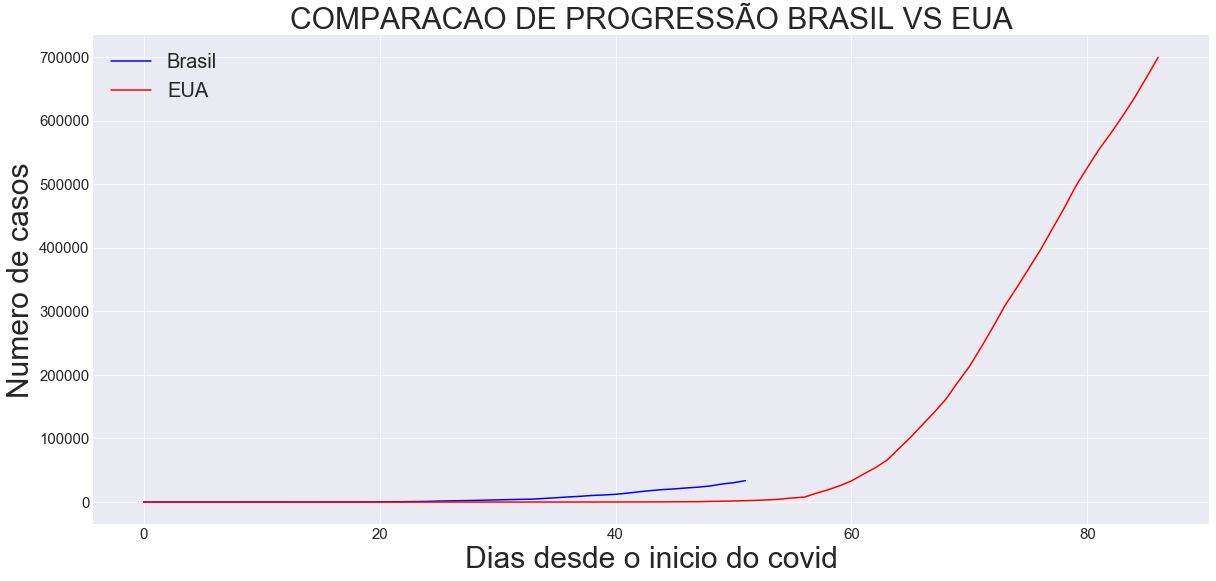

In [0]:
plt.figure(figsize=(20, 9))
plt.plot(dias_brasil, casos_brasil, color='blue')
plt.plot(dias_eua, casos_eua, color='red')

plt.title('COMPARACAO DE PROGRESSÃO BRASIL VS EUA', size=30)
plt.xlabel('Dias desde o inicio do covid', size = 30)
plt.ylabel('Numero de casos', size = 30)
plt.legend(['Brasil', 'EUA'],  prop={'size': 20}, loc="upper left")


plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


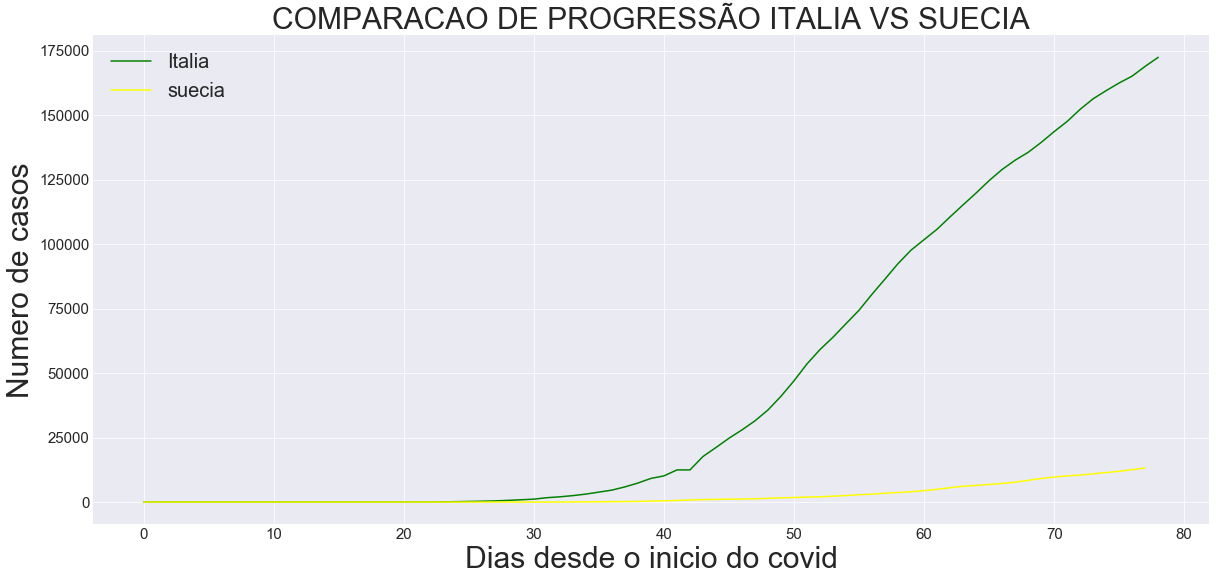

In [0]:
plt.figure(figsize=(20, 9))
plt.plot(dias_italia, casos_italia, color='green')
plt.plot(dias_suecia, casos_suecia, color='yellow')


plt.title('COMPARACAO DE PROGRESSÃO ITALIA VS SUECIA', size=30)
plt.xlabel('Dias desde o inicio do covid', size = 30)
plt.ylabel('Numero de casos', size = 30)
plt.legend(['Italia', 'suecia'],  prop={'size': 20}, loc="upper left")


plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


mesmo caso da italia, precisamos de um percentual para saber como realmente esta

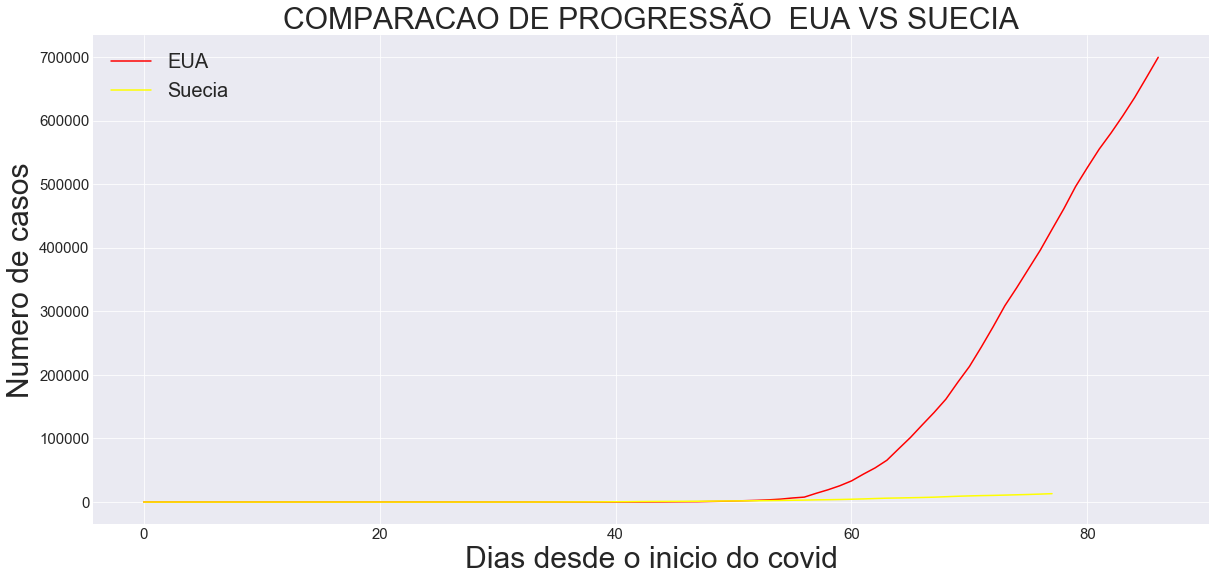

In [0]:
plt.figure(figsize=(20, 9))
plt.plot(dias_eua, casos_eua, color='red')
plt.plot(dias_suecia, casos_suecia, color='yellow')


plt.title('COMPARACAO DE PROGRESSÃO  EUA VS SUECIA', size=30)
plt.xlabel('Dias desde o inicio do covid', size = 30)
plt.ylabel('Numero de casos', size = 30)
plt.legend(['EUA', 'Suecia'],  prop={'size': 20}, loc="upper left")


plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


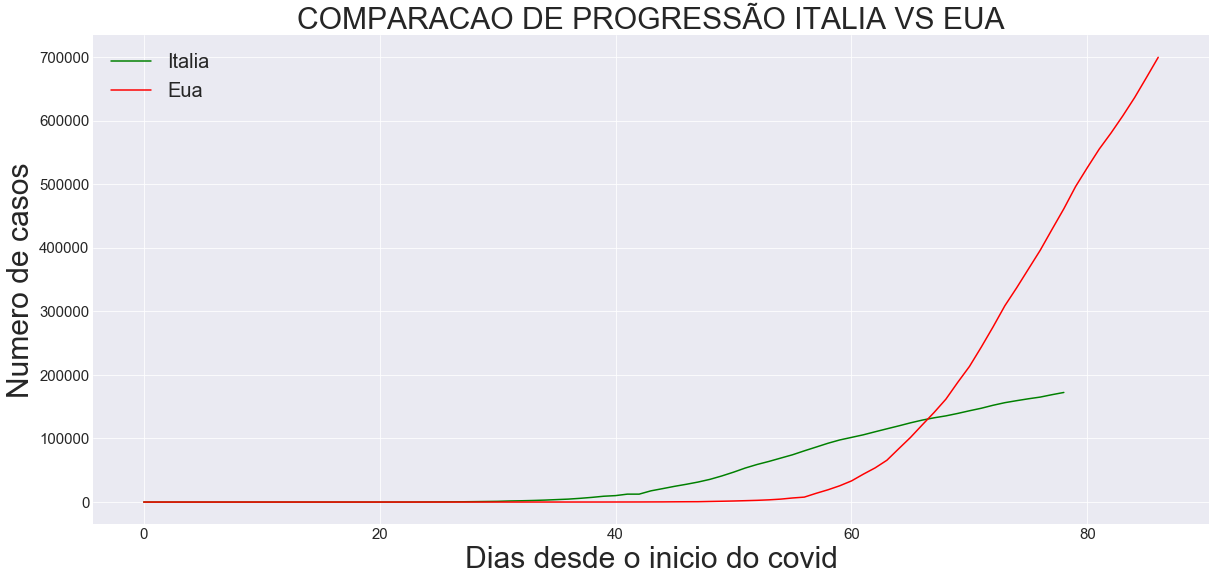

In [0]:
plt.figure(figsize=(20, 9))
plt.plot(dias_italia, casos_italia, color='green')
plt.plot(dias_eua, casos_eua, color='red')


plt.title('COMPARACAO DE PROGRESSÃO ITALIA VS EUA', size=30)
plt.xlabel('Dias desde o inicio do covid', size = 30)
plt.ylabel('Numero de casos', size = 30)
plt.legend(['Italia', 'Eua'],  prop={'size': 20}, loc="upper left")


plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


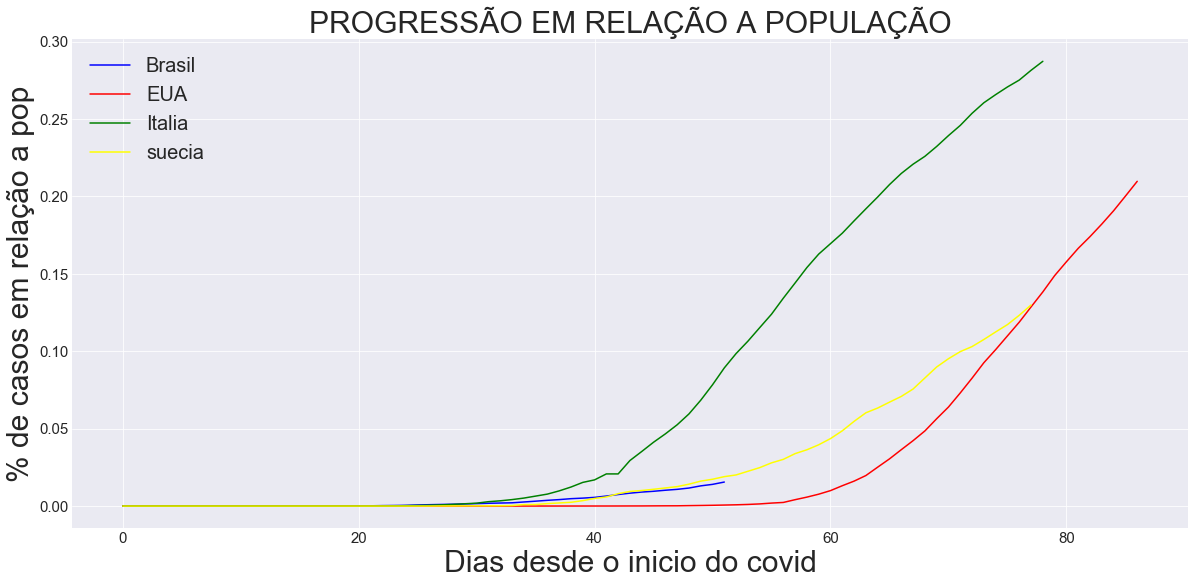

In [0]:
eua_porc = []
br_porc = []
it_porc = []
su_porc = []

for i in casos_eua:
  porc = (i / 333545145)*100
  eua_porc.append(porc)
for i in casos_brasil:
  porc = (i / 217089238)*100
  br_porc.append(porc)
for i in casos_italia:
  porc = (i / 60017348)*100
  it_porc.append(porc)
for i in casos_suecia:
  porc = (i / 10174790)*100
  su_porc.append(porc)

plt.figure(figsize=(20, 9))
plt.plot(dias_brasil, br_porc, color='blue')
plt.plot(dias_eua, eua_porc, color='red')
plt.plot(dias_italia, it_porc, color='green')
plt.plot(dias_suecia, su_porc, color='yellow')

plt.title('PROGRESSÃO EM RELAÇÃO A POPULAÇÃO', size=30)
plt.xlabel('Dias desde o inicio do covid', size = 30)
plt.ylabel('% de casos em relação a pop', size = 30)
plt.legend(['Brasil', 'EUA','Italia', 'suecia'],  prop={'size': 20}, loc="upper left")


plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


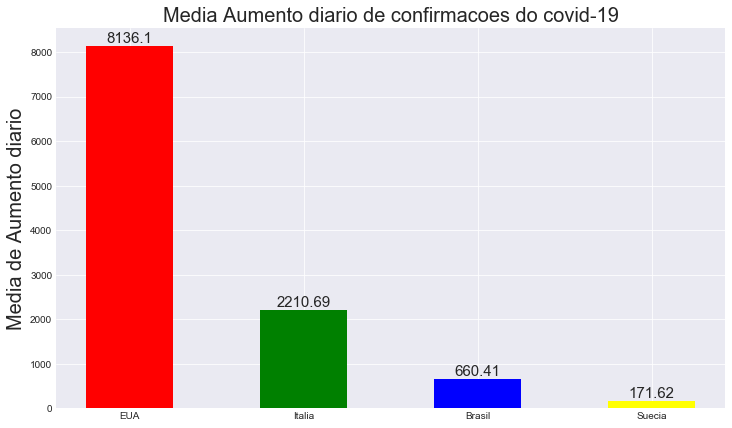

In [0]:
conf_eua1, conf_eua2 = itertools.tee(iter(list(casos_eua)))
next(conf_eua2)
conf_it1, conf_it2 = itertools.tee(iter(list(casos_italia)))
next(conf_it2)
conf_br1, conf_br2 = itertools.tee(iter(list(casos_brasil)))
next(conf_br2)
conf_su1, conf_su2 = itertools.tee(iter(list(casos_suecia)))
next(conf_su2)
diferenca_eua =[int(r) - int(p) for p,r in zip(conf_eua1, conf_eua2)]
diferenca_italia =[int(r) - int(p) for p,r in zip(conf_it1, conf_it2)]
diferenca_brasil =[int(r) - int(p) for p,r in zip(conf_br1, conf_br2)]
diferenca_suecia =[int(r) - int(p) for p,r in zip(conf_su1, conf_su2)]
diferenca_eua = np.array(diferenca_eua).mean()
diferenca_italia = np.array(diferenca_italia).mean()
diferenca_brasil = np.array(diferenca_brasil).mean()
diferenca_suecia = np.array(diferenca_suecia).mean()

paises = ['EUA', 'Italia', 'Brasil', 'Suecia']
numeros = [diferenca_eua, diferenca_italia, diferenca_brasil, diferenca_suecia]
numeros = [round(m, 2) for m in numeros]
fig = plt.figure(figsize=(12, 7))
rects = plt.bar(paises, numeros, align='center', color=['red', 'green', 'blue', 'yellow'], width=0.5)
ax = rects.patches

for rect, label in zip(ax, numeros):
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height + 5, label,
            ha='center', va='bottom', fontsize=15)
    
plt.ylabel('Media de Aumento diario', size = 20)
plt.title('Media Aumento diario de confirmacoes do covid-19', size=20)
plt.show()

 **O QUE PODE-SE REPARAR ATRAVEZ DESSES GRAFICOS DE CASOS:**
*   A italia esta partindo para a estabilização


*   A suecia assim como o Brasil esta em sua subida, apesar de a suecia ter demorado mais, se assemelha mto com o brasil
*   **Quando usamos porcentagem de população o Brasil eh oq menos tem casos**, e esta crescendo em um ritmo igual ao da suecia, logo espera-se que ate o 70º dia o Brasil tenha + ou -  172 mil casos
*   O Brasil assim como a suecia, tendem a ter mais casos percentuais doq os Estados Unidos
*   A Italia cresceu de forma muito grande percentualmente
*   Apesar do achatamento a Italia tem uma media de casos diarios muito grande





repetiremos os mesmos graficos para mortes, e depois faremos graficos de mortes vs recuperados

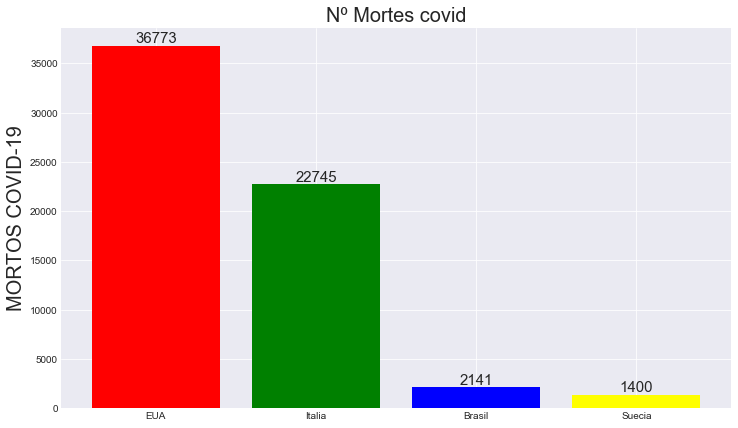

In [0]:
fig = plt.figure(figsize=(12, 7))
paises = ['EUA', 'Italia', 'Brasil', 'Suecia']
numeros = [mortos_eua, mortos_italia, mortos_brasil, mortos_suecia]
rects = plt.bar(paises,numeros, align='center', color=['red', 'green', 'blue', 'yellow'])

ax = rects.patches
for rect, label in zip(ax, numeros):
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height , label,
            ha='center', va='bottom', fontsize=15)
    
plt.ylabel('MORTOS COVID-19', size = 20)
plt.title('Nº Mortes covid', size=20)
plt.show()

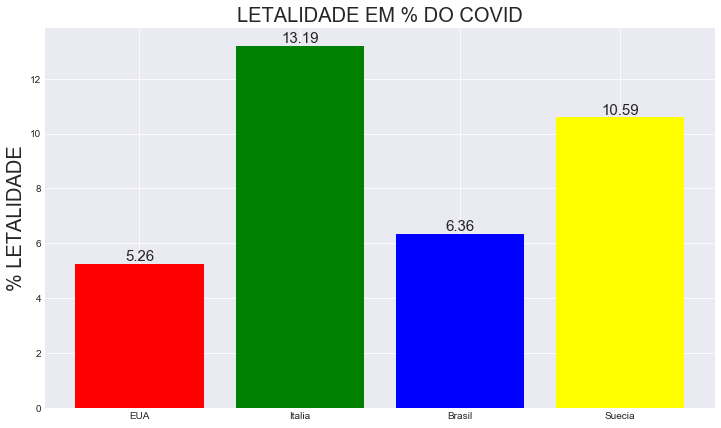

In [0]:
fig = plt.figure(figsize=(12, 7))
paises = ['EUA', 'Italia', 'Brasil', 'Suecia']
numeros = [(mortos_eua/confirmados_eua)*100, (mortos_italia/confirmados_italia) *100, 
           (mortos_brasil/confirmados_brasil)*100, (mortos_suecia/confirmados_suecia)*100]
numeros = [round(num, 2) for num in numeros]
rects = plt.bar(paises,numeros, align='center', color=['red', 'green', 'blue', 'yellow'])

ax = rects.patches
for rect, label in zip(ax, numeros):
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height , label,
            ha='center', va='bottom', fontsize=15)
    
plt.ylabel('% LETALIDADE', size = 20)
plt.title('LETALIDADE EM % DO COVID', size=20)
plt.show()

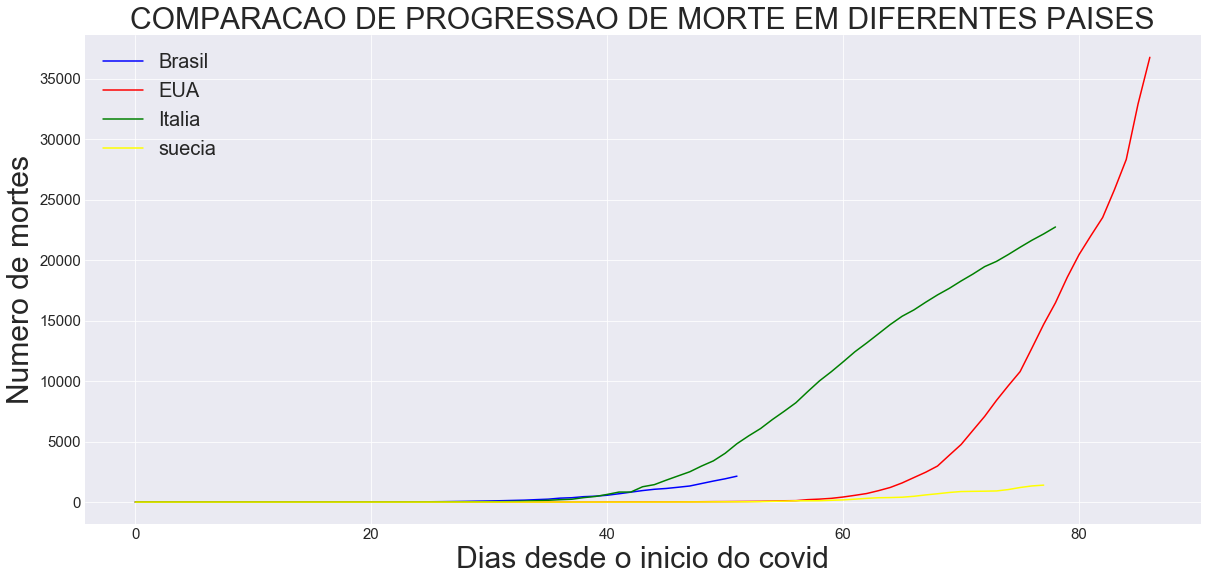

In [0]:
plt.figure(figsize=(20, 9))
plt.plot(dias_brasil, mortes_brasil, color='blue')
plt.plot(dias_eua, mortes_eua, color='red')
plt.plot(dias_italia, mortes_italia, color='green')
plt.plot(dias_suecia, mortes_suecia, color='yellow')

plt.title('COMPARACAO DE PROGRESSAO DE MORTE EM DIFERENTES PAISES', size=30)
plt.xlabel('Dias desde o inicio do covid', size = 30)
plt.ylabel('Numero de mortes', size = 30)
plt.legend(['Brasil', 'EUA','Italia', 'suecia'],  prop={'size': 20}, loc="upper left")


plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


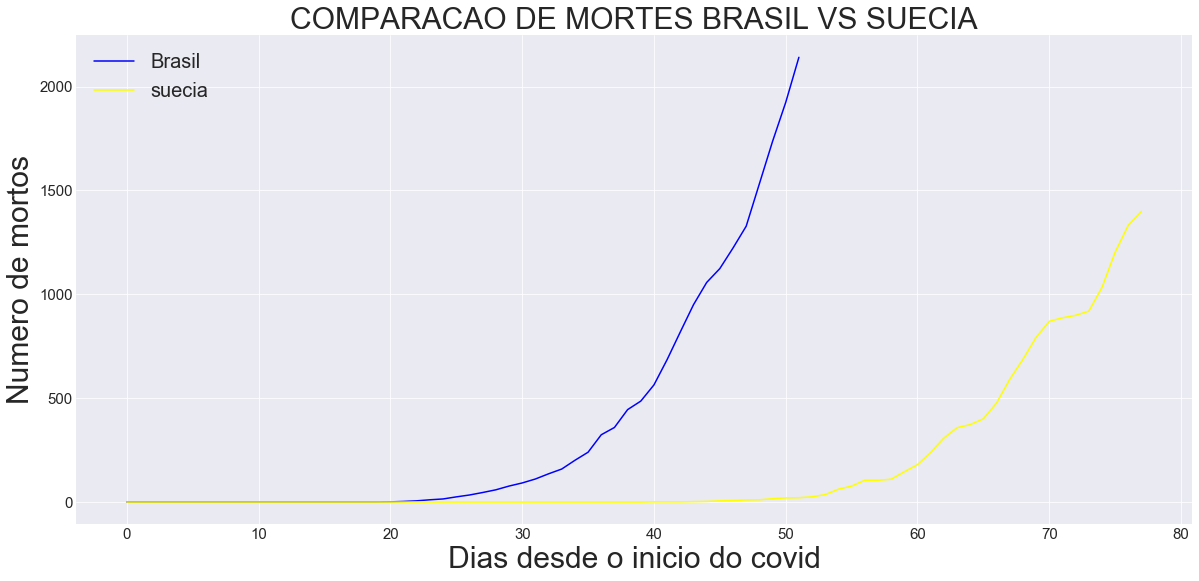

In [0]:
plt.figure(figsize=(20, 9))
plt.plot(dias_brasil, mortes_brasil, color='blue')
plt.plot(dias_suecia, mortes_suecia, color='yellow')


plt.title('COMPARACAO DE MORTES BRASIL VS SUECIA', size=30)
plt.xlabel('Dias desde o inicio do covid', size = 30)
plt.ylabel('Numero de mortos', size = 30)
plt.legend(['Brasil', 'suecia'],  prop={'size': 20}, loc="upper left")


plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


a curva de mortes dos dois paises se parecem muito, com  a diferenca que a do Brasil comecou a subir antes

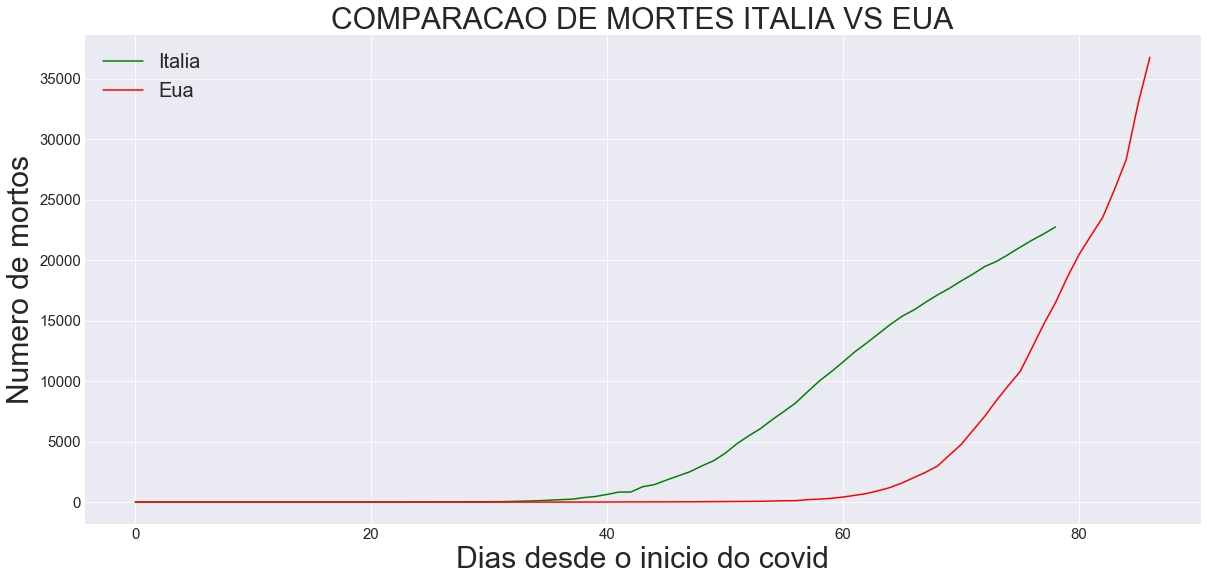

In [0]:
plt.figure(figsize=(20, 9))
plt.plot(dias_italia, mortes_italia, color='green')
plt.plot(dias_eua, mortes_eua, color='red')

plt.title('COMPARACAO DE MORTES ITALIA VS EUA', size=30)
plt.xlabel('Dias desde o inicio do covid', size = 30)
plt.ylabel('Numero de mortos', size = 30)
plt.legend(['Italia', 'Eua'],  prop={'size': 20}, loc="upper left")


plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


vemos que a italia esta diminuindo os casos de morte, sua curva esta sendo "achatada", enquanto os eua estao so aumentando

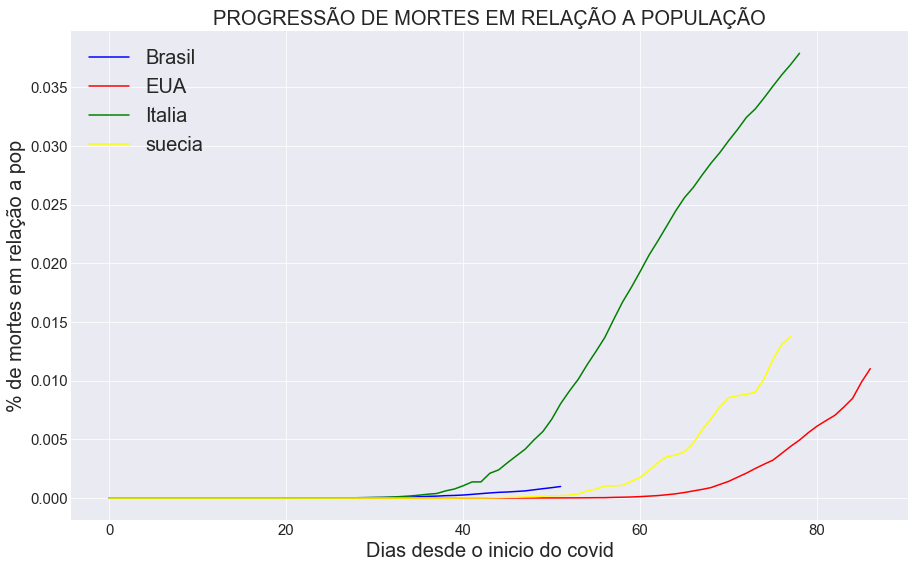

In [0]:
eua_porc = []
br_porc = []
it_porc = []
su_porc = []

for i in mortes_eua:
  porc = (i / 333545145)*100
  eua_porc.append(porc)
for i in mortes_brasil:
  porc = (i / 217089238)*100
  br_porc.append(porc)
for i in mortes_italia:
  porc = (i / 60017348)*100
  it_porc.append(porc)
for i in mortes_suecia:
  porc = (i / 10174790)*100
  su_porc.append(porc)

plt.figure(figsize=(15, 9))
plt.plot(dias_brasil, br_porc, color='blue')
plt.plot(dias_eua, eua_porc, color='red')
plt.plot(dias_italia, it_porc, color='green')
plt.plot(dias_suecia, su_porc, color='yellow')

plt.title('PROGRESSÃO DE MORTES EM RELAÇÃO A POPULAÇÃO', size=20)
plt.xlabel('Dias desde o inicio do covid', size = 20)
plt.ylabel('% de mortes em relação a pop', size = 20)
plt.legend(['Brasil', 'EUA','Italia', 'suecia'],  prop={'size': 20}, loc="upper left")


plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


Quando vemos as mortes em relacao a % de populacao reparamos algumas coisas


*   A italia ainda eh disparada na frente com mais numeros de mortes
*   A italia esta indo ao achatamento da curva, enquanto os outros paises estao na subida da curva
*   A suecia e maior que o dos  EUA
*   O Brasil esta crescendo de forma mais rapida que os EUA e a Suecia






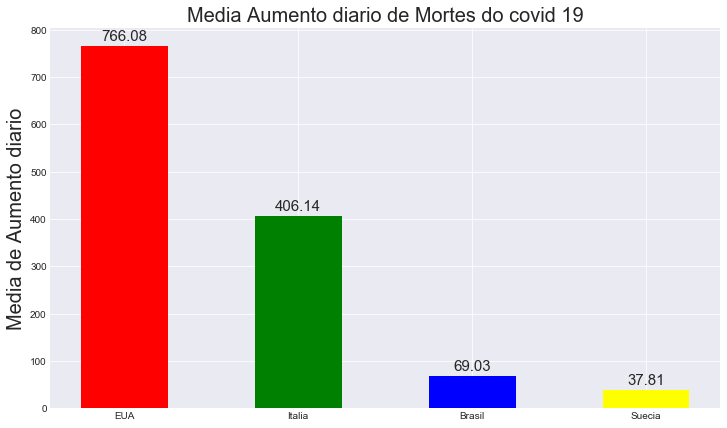

In [0]:
conf_eua1, conf_eua2 = itertools.tee(iter(list(mortes_eua[38:])))
next(conf_eua2)
conf_it1, conf_it2 = itertools.tee(iter(list(mortes_italia[22:])))
next(conf_it2)
conf_br1, conf_br2 = itertools.tee(iter(list(mortes_brasil[20:])))
next(conf_br2)
conf_su1, conf_su2 = itertools.tee(iter(list(mortes_suecia[40:])))
next(conf_su2)
diferenca_eua =[int(r) - int(p) for p,r in zip(conf_eua1, conf_eua2)]
diferenca_italia =[int(r) - int(p) for p,r in zip(conf_it1, conf_it2)]
diferenca_brasil =[int(r) - int(p) for p,r in zip(conf_br1, conf_br2)]
diferenca_suecia =[int(r) - int(p) for p,r in zip(conf_su1, conf_su2)]
diferenca_eua = np.array(diferenca_eua).mean()
diferenca_italia = np.array(diferenca_italia).mean()
diferenca_brasil = np.array(diferenca_brasil).mean()
diferenca_suecia = np.array(diferenca_suecia).mean()

paises = ['EUA', 'Italia', 'Brasil', 'Suecia']
numeros = [diferenca_eua, diferenca_italia, diferenca_brasil, diferenca_suecia]
numeros = [round(m, 2) for m in numeros]
fig = plt.figure(figsize=(12, 7))
rects = plt.bar(paises, numeros, align='center', color=['red', 'green', 'blue', 'yellow'], width=0.5)
ax = rects.patches

for rect, label in zip(ax, numeros):
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height + 5, label,
            ha='center', va='bottom', fontsize=15)
    
plt.ylabel('Media de Aumento diario', size = 20)
plt.title('Media Aumento diario de Mortes do covid 19', size=20)
plt.show()

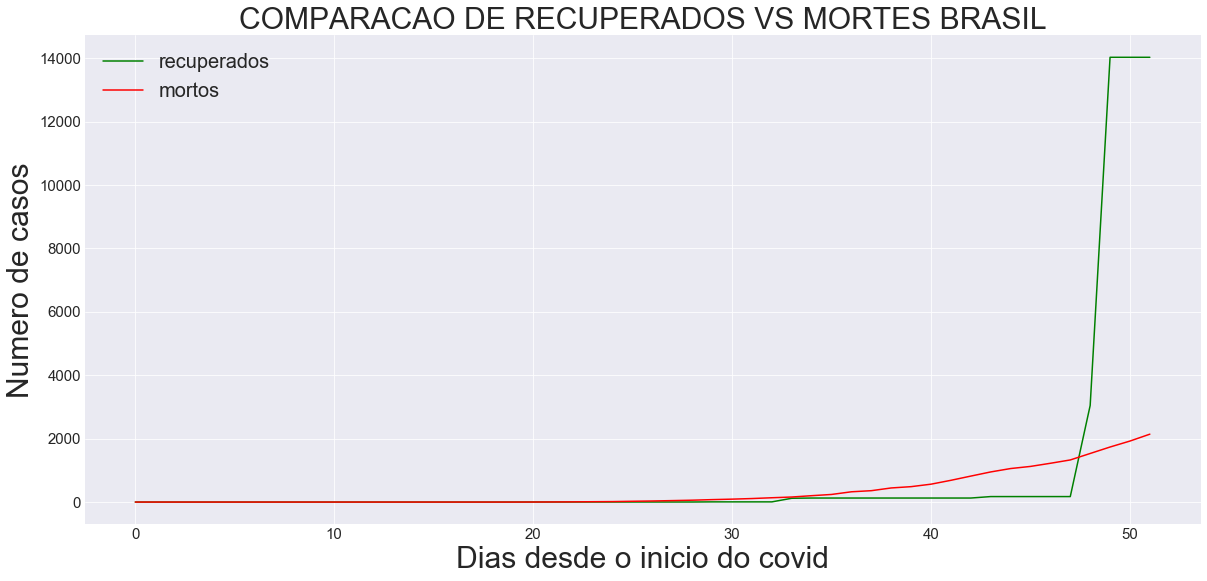

In [0]:
plt.figure(figsize=(20, 9))
plt.plot(dias_brasil, recuperados_brasil, color='green')
plt.plot(dias_brasil, mortes_brasil, color='red')


plt.title('COMPARACAO DE RECUPERADOS VS MORTES BRASIL', size=30)
plt.xlabel('Dias desde o inicio do covid', size = 30)
plt.ylabel('Numero de casos', size = 30)
plt.legend(['recuperados', 'mortos'],  prop={'size': 20}, loc="upper left")


plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


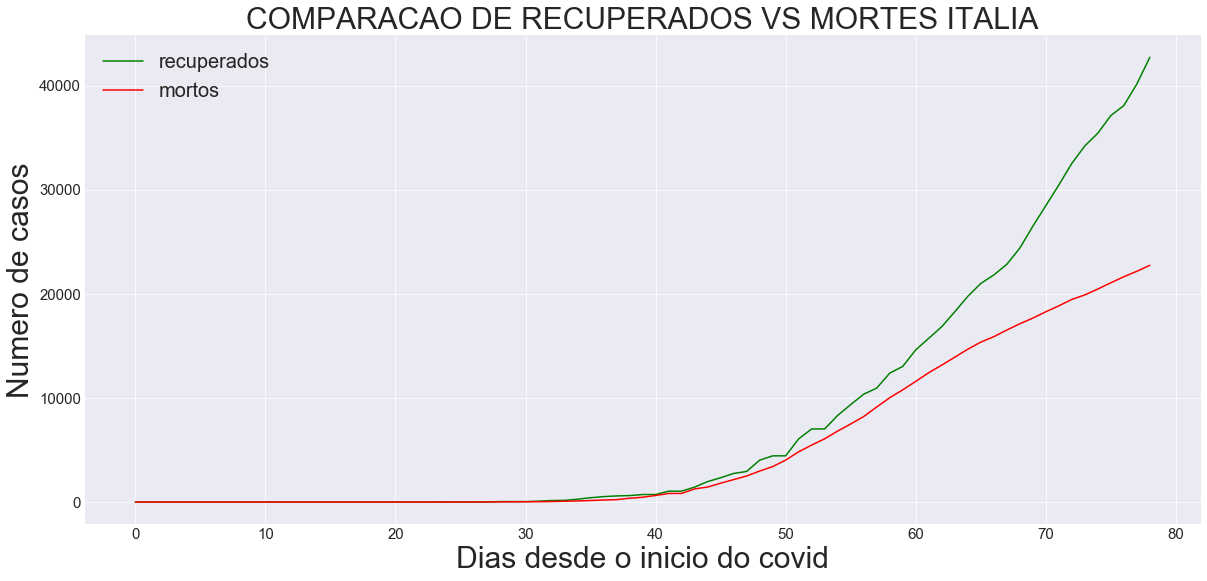

In [0]:
plt.figure(figsize=(20, 9))
plt.plot(dias_italia, recuperados_italia, color='green')
plt.plot(dias_italia, mortes_italia, color='red')


plt.title('COMPARACAO DE RECUPERADOS VS MORTES ITALIA', size=30)
plt.xlabel('Dias desde o inicio do covid', size = 30)
plt.ylabel('Numero de casos', size = 30)
plt.legend(['recuperados', 'mortos'],  prop={'size': 20}, loc="upper left")


plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


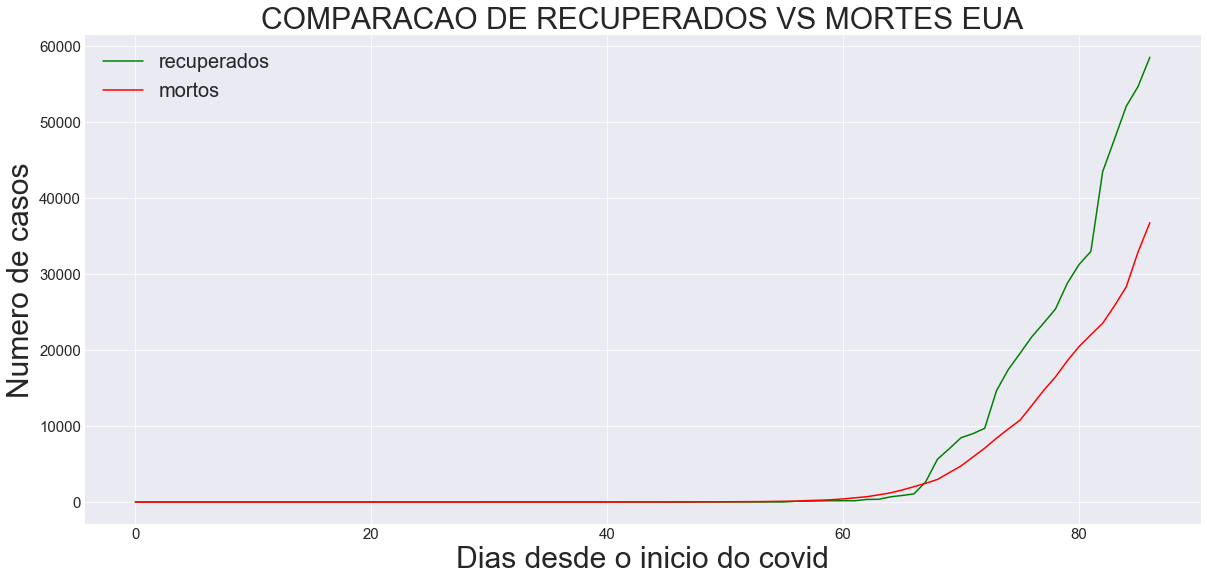

In [0]:
plt.figure(figsize=(20, 9))
plt.plot(dias_eua, recuperados_eua, color='green')
plt.plot(dias_eua, mortes_eua, color='red')


plt.title('COMPARACAO DE RECUPERADOS VS MORTES EUA', size=30)
plt.xlabel('Dias desde o inicio do covid', size = 30)
plt.ylabel('Numero de casos', size = 30)
plt.legend(['recuperados', 'mortos'],  prop={'size': 20}, loc="upper left")


plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


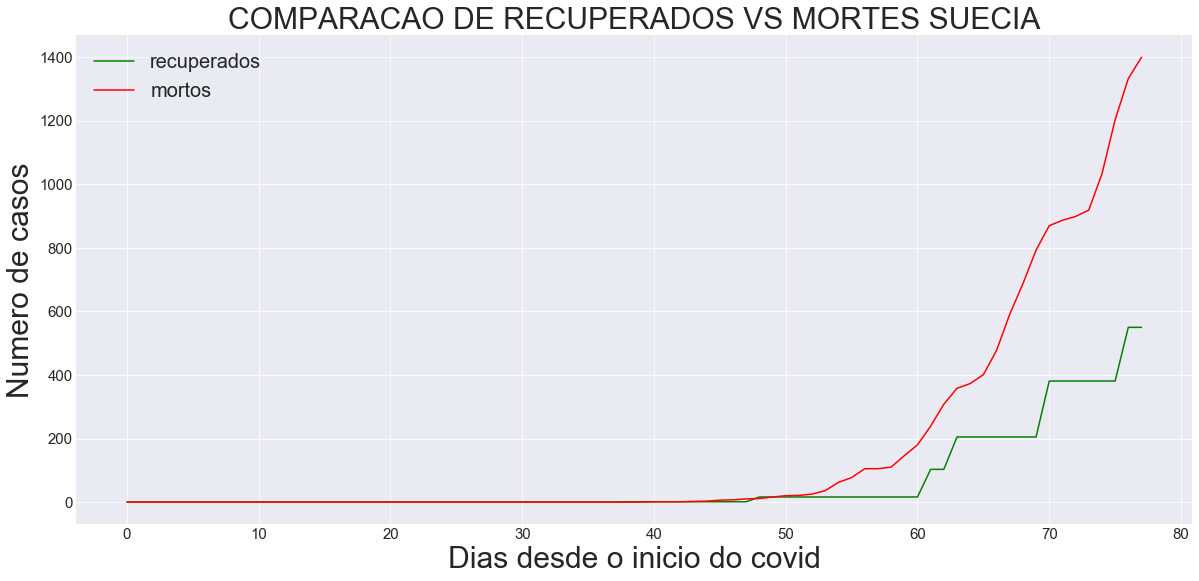

In [0]:
plt.figure(figsize=(20, 9))
plt.plot(dias_suecia, recuperados_suecia, color='green')
plt.plot(dias_suecia, mortes_suecia, color='red')


plt.title('COMPARACAO DE RECUPERADOS VS MORTES SUECIA', size=30)
plt.xlabel('Dias desde o inicio do covid', size = 30)
plt.ylabel('Numero de casos', size = 30)
plt.legend(['recuperados', 'mortos'],  prop={'size': 20}, loc="upper left")


plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


# Previsões

Nesta secao nos aplicaremos o algoritmo SVR do sklearn para tentar prever o numero de mortes, casos e recuperados dos 4 paises nos proximos 40 dias.


---

OBS: 
Otimizações serão feitas conforme o passar do tempo

In [0]:
#separando o target(valor a ser previsto) das datas
target_confirmado_br = df_confirmados_brasil['cases'].copy()
df_confirmados_brasil.drop('cases', axis = 1, inplace= True)

target_mortos_br = df_mortes_brasil['deaths'].copy()
df_mortes_brasil.drop('deaths', axis = 1, inplace= True)

target_recuperado_br = df_recuperados_brasil['recovery']
df_recuperados_brasil.drop('recovery', axis = 1, inplace= True)
#-------------------------------------------------------------------------
target_confirmado_eua = df_confirmados_eua['cases'].copy()
df_confirmados_eua.drop('cases', axis = 1, inplace= True)

target_mortos_eua = df_mortes_eua['deaths'].copy()
df_mortes_eua.drop('deaths', axis = 1, inplace= True)

target_recuperado_eua = df_recuperados_eua['recovery']
df_recuperados_eua.drop('recovery', axis = 1, inplace= True)
#-------------------------------------------------------------------------
target_confirmado_italia = df_confirmados_italia['cases'].copy()
df_confirmados_italia.drop('cases', axis = 1, inplace= True)

target_mortos_italia = df_mortes_italia['deaths'].copy()
df_mortes_italia.drop('deaths', axis = 1, inplace= True)

target_recuperado_italia = df_recuperados_italia['recovery']
df_recuperados_italia.drop('recovery', axis = 1, inplace= True)
#-------------------------------------------------------------------------
target_confirmado_suecia = df_confirmados_suecia['cases'].copy()
df_confirmados_suecia.drop('cases', axis = 1, inplace= True)

target_mortos_suecia = df_mortes_suecia['deaths'].copy()
df_mortes_suecia.drop('deaths', axis = 1, inplace= True)

target_recuperado_suecia = df_recuperados_suecia['recovery']
df_recuperados_suecia.drop('recovery', axis = 1, inplace= True)

In [0]:
#COMECAREMOS PELO BRASIL:

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_confirmados_brasil, target_confirmado_br, test_size=0.1, random_state=42)

In [0]:
params = {'C': [2], 'coef0': [0.0, 3.5], 'epsilon': [0.001], 'gamma': [0.5], 'kernel': ['poly'], 'max_iter': [-1], 'shrinking':[False]}
# o gridsearch esta implementando bruto em outro arquivo na maquina local, pois ele demorou mais de 24h para rodar
svr = SVR()
svm = GridSearchCV(svr, params,scoring='neg_mean_absolute_error', cv=10,return_train_score=False, n_jobs=-1, verbose=1 )
print('fitting...')
svm.fit(X_train,y_train)

fitting...
Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  2.9min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [2], 'coef0': [0.0, 3.5], 'epsilon': [0.001],
                         'gamma': [0.5], 'kernel': ['poly'], 'max_iter': [-1],
                         'shrinking': [False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_absolute_error', verbose=1)

In [0]:
pred_caso_br = svm.predict(futuro_brasil)

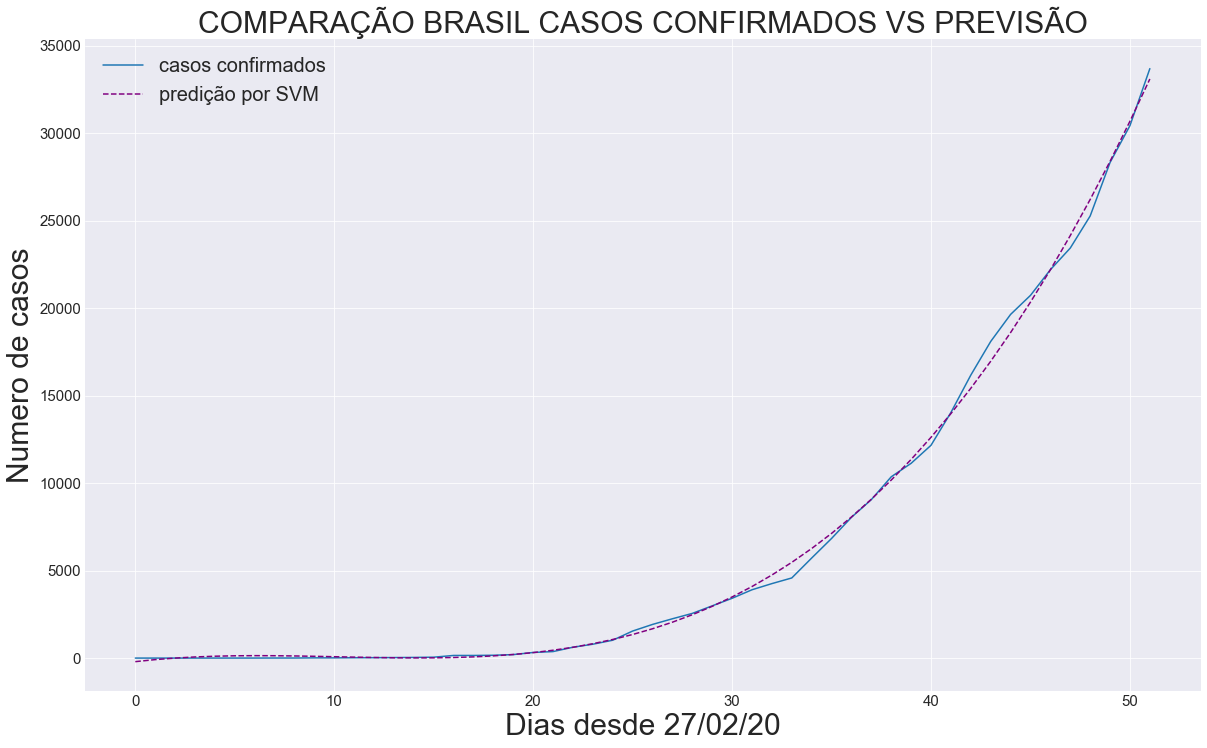

In [0]:
plt.figure(figsize=(20, 12))
plt.plot(dias_brasil, casos_brasil)
plt.plot(futuro_brasil[0:52],pred_caso_br[0:52], linestyle = 'dashed', color='purple')
plt.title('COMPARAÇÃO BRASIL CASOS CONFIRMADOS VS PREVISÃO', size=30)
plt.xlabel('Dias desde 27/02/20', size = 30)
plt.ylabel('Numero de casos', size = 30)
plt.legend(['casos confirmados', 'predição por SVM'],  prop={'size': 20}, loc="upper left")


plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


In [0]:
# predicao mortes brasil
X_train, X_test, y_train, y_test = train_test_split(df_mortes_brasil, target_mortos_br, test_size=0.1, random_state=42)

params = {'C': [2],
 'coef0': [4.0],
 'epsilon': [0.01],
 'gamma': [0.1],
 'kernel': ['poly'],
 'max_iter': [-1],
 'shrinking': [True],
 'degree':[4]}
# o gridsearch esta implementando bruto em outro arquivo na maquina local, pois ele demorou mais de 24h para rodar
svr = SVR()
svm = GridSearchCV(svr, params,scoring='neg_mean_absolute_error', cv=10,return_train_score=False, n_jobs=-1, verbose=1 )
print('fitting...')
svm.fit(X_train,y_train)

fitting...
Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:  4.1min remaining:  2.7min
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed: 12.1min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [2], 'coef0': [4.0], 'degree': [4],
                         'epsilon': [0.01], 'gamma': [0.1], 'kernel': ['poly'],
                         'max_iter': [-1], 'shrinking': [True]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_absolute_error', verbose=1)

In [0]:
pred_mortes_br = svm.predict(futuro_brasil)

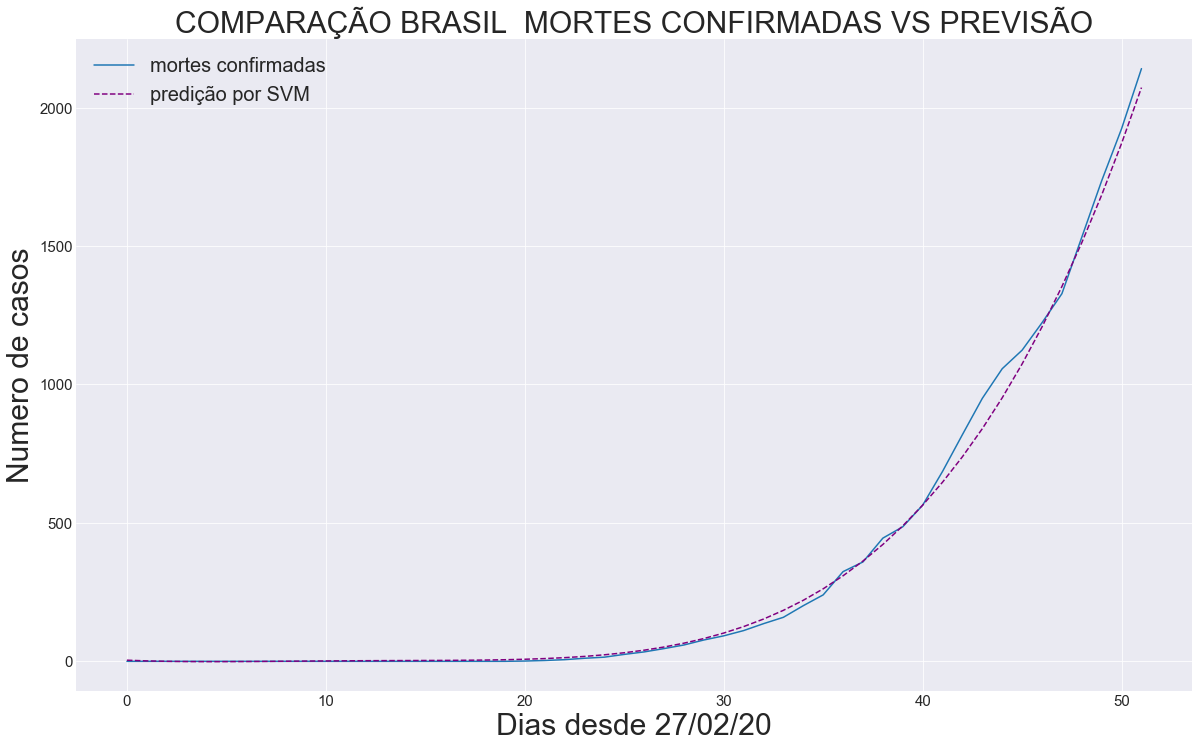

In [0]:
plt.figure(figsize=(20, 12))
plt.plot(dias_brasil, mortes_brasil)
plt.plot(futuro_brasil[0:52], pred_mortes_br[0:52], linestyle = 'dashed', color='purple')
plt.title('COMPARAÇÃO BRASIL  MORTES CONFIRMADAS VS PREVISÃO', size=30)
plt.xlabel('Dias desde 27/02/20', size = 30)
plt.ylabel('Numero de casos', size = 30)
plt.legend(['mortes confirmadas', 'predição por SVM'],  prop={'size': 20}, loc="upper left")


plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


In [0]:
# predicao casos EUA
X_train, X_test, y_train, y_test = train_test_split(df_confirmados_eua, target_confirmado_eua, test_size=0.1, random_state=42)

params = {'C': [2], 'coef0': [0.0, 3.5], 'epsilon': [0.001], 'gamma': [0.5], 'kernel': ['poly'], 'max_iter': [-1], 'shrinking':[False]}
# o gridsearch esta implementando bruto em outro arquivo na maquina local, pois ele demorou mais de 24h para rodar
svr = SVR()
svm = GridSearchCV(svr, params,scoring='neg_mean_absolute_error', cv=10,return_train_score=False, n_jobs=-1, verbose=1 )
print('fitting...')
svm.fit(X_train,y_train)

fitting...
Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  2.7min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [2], 'coef0': [0.0, 3.5], 'epsilon': [0.001],
                         'gamma': [0.5], 'kernel': ['poly'], 'max_iter': [-1],
                         'shrinking': [False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_absolute_error', verbose=1)

In [0]:
pred_caso_eua = svm.predict(futuro_eua)

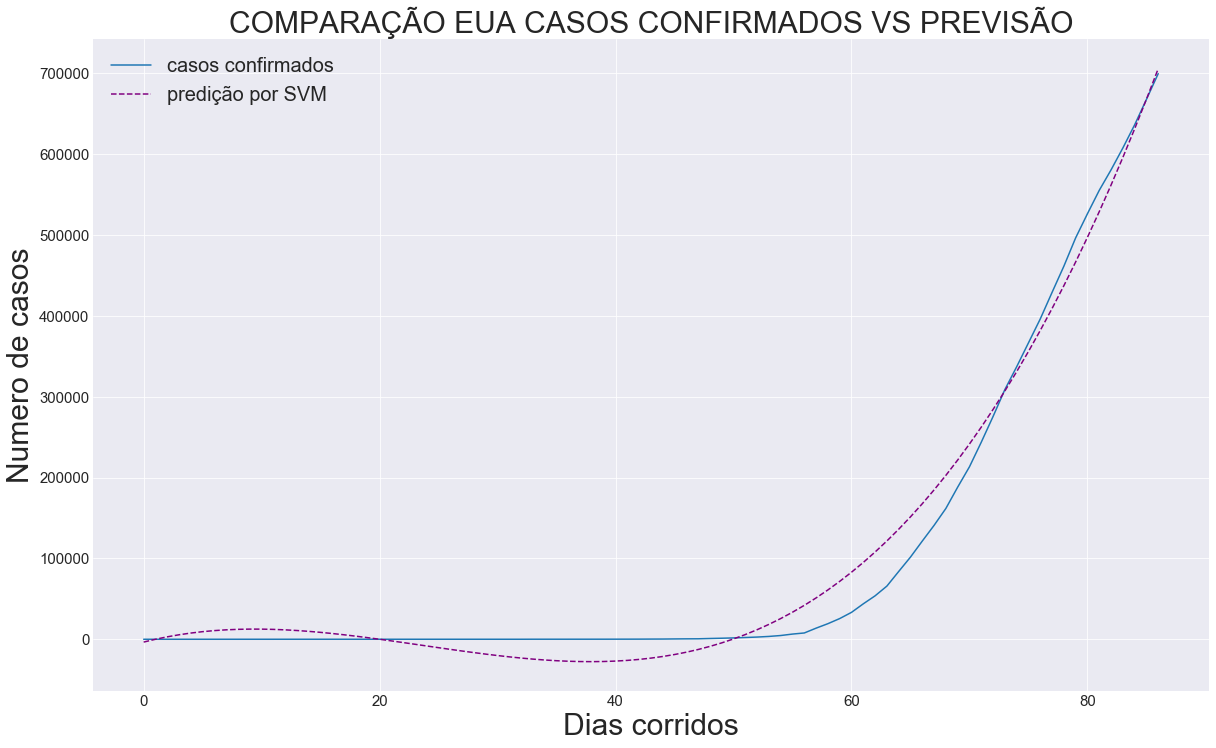

In [0]:
plt.figure(figsize=(20, 12))
plt.plot(dias_eua, casos_eua)
plt.plot(futuro_eua[0:87],pred_caso_eua[0:87], linestyle = 'dashed', color='purple')
plt.title('COMPARAÇÃO EUA CASOS CONFIRMADOS VS PREVISÃO', size=30)
plt.xlabel('Dias corridos', size = 30)
plt.ylabel('Numero de casos', size = 30)
plt.legend(['casos confirmados', 'predição por SVM'],  prop={'size': 20}, loc="upper left")


plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


In [0]:
# predicao mortos EUA
X_train, X_test, y_train, y_test = train_test_split(df_mortes_eua, target_mortos_eua, test_size=0.1, random_state=42)

params = {'C': [2], 'coef0': [0.0, 3.5], 'epsilon': [0.001], 'gamma': [0.5], 'kernel': ['poly'], 'max_iter': [-1], 'shrinking':[False]}
# o gridsearch esta implementando bruto em outro arquivo na maquina local, pois ele demorou mais de 24h para rodar
svr = SVR()
svm = GridSearchCV(svr, params,scoring='neg_mean_absolute_error', cv=10,return_train_score=False, n_jobs=-1, verbose=1 )
print('fitting...')
svm.fit(X_train,y_train)

fitting...
Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed: 22.6min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [2], 'coef0': [0.0, 3.5], 'epsilon': [0.001],
                         'gamma': [0.5], 'kernel': ['poly'], 'max_iter': [-1],
                         'shrinking': [False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_absolute_error', verbose=1)

In [0]:
pred_mortes_eua = svm.predict(futuro_eua)

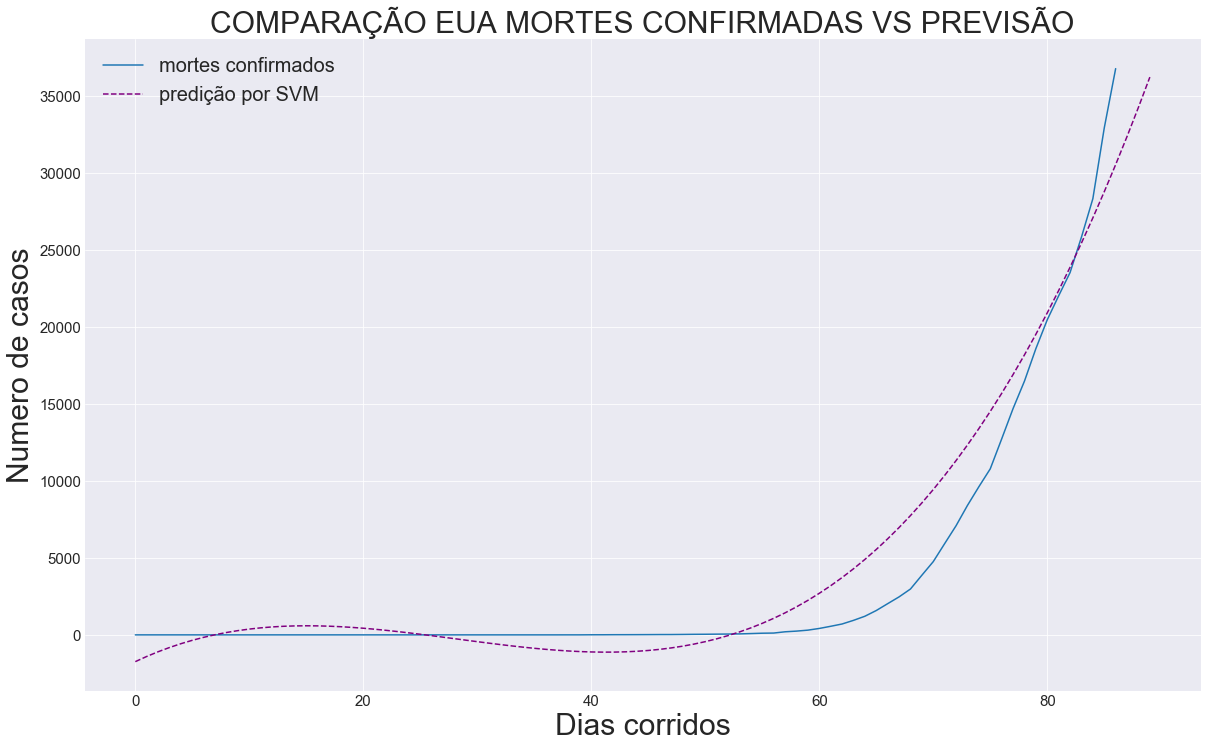

In [0]:
plt.figure(figsize=(20, 12))
plt.plot(dias_eua, mortes_eua)
plt.plot(futuro_eua[0:90],pred_mortes_eua[0:90], linestyle = 'dashed', color='purple')
plt.title('COMPARAÇÃO EUA MORTES CONFIRMADAS VS PREVISÃO', size=30)
plt.xlabel('Dias corridos', size = 30)
plt.ylabel('Numero de casos', size = 30)
plt.legend(['mortes confirmados', 'predição por SVM'],  prop={'size': 20}, loc="upper left")


plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

In [0]:
# predicao casos ITALIA
X_train, X_test, y_train, y_test = train_test_split(df_confirmados_italia, target_confirmado_italia, test_size=0.1, random_state=42)

params = {'C': [2], 'coef0': [0.0, 3.5], 'epsilon': [0.001], 'gamma': [0.5], 'kernel': ['poly'], 'max_iter': [-1], 'shrinking':[False]}
# o gridsearch esta implementando bruto em outro arquivo na maquina local, pois ele demorou mais de 24h para rodar
svr = SVR()
svm = GridSearchCV(svr, params,scoring='neg_mean_absolute_error', cv=10,return_train_score=False, n_jobs=-1, verbose=1 )
print('fitting...')
svm.fit(X_train,y_train)

fitting...
Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  7.1min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [2], 'coef0': [0.0, 3.5], 'epsilon': [0.001],
                         'gamma': [0.5], 'kernel': ['poly'], 'max_iter': [-1],
                         'shrinking': [False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_absolute_error', verbose=1)

In [0]:
pred_caso_italia = svm.predict(futuro_italia)

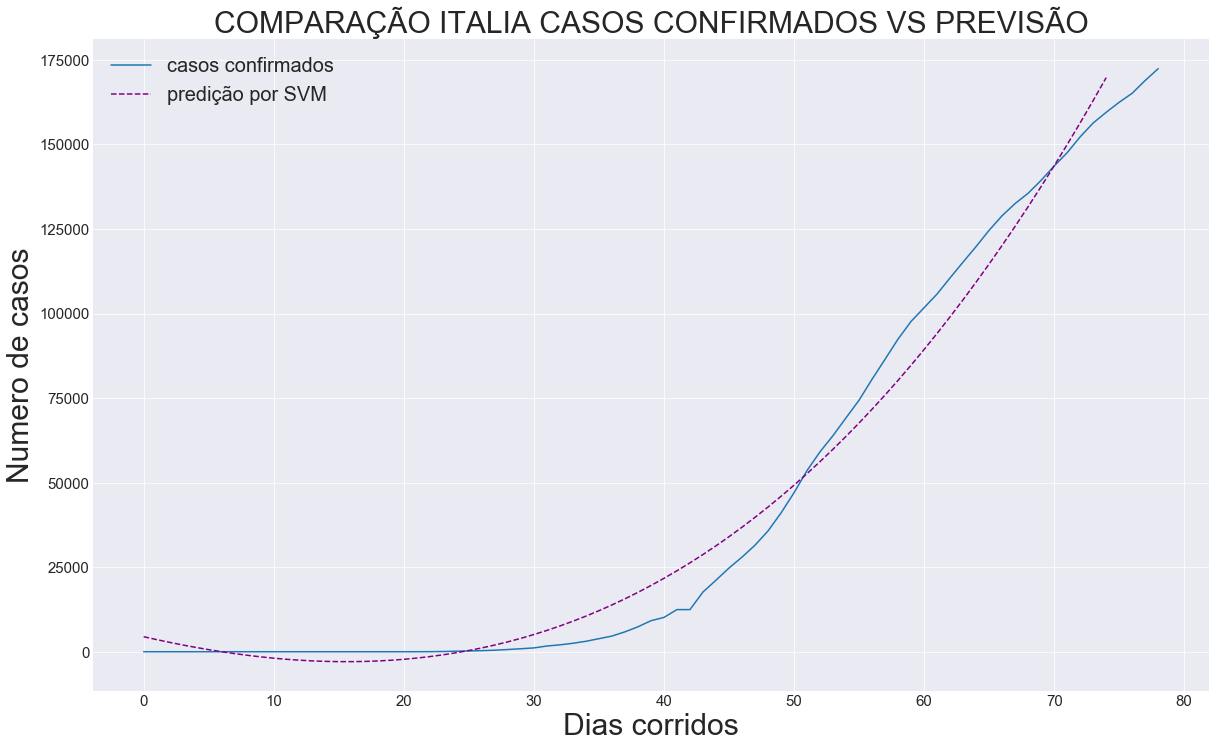

In [0]:
plt.figure(figsize=(20, 12))
plt.plot(dias_italia, casos_italia)
plt.plot(futuro_italia[0:75],pred_caso_italia[0:75], linestyle = 'dashed', color='purple')
plt.title('COMPARAÇÃO ITALIA CASOS CONFIRMADOS VS PREVISÃO', size=30)
plt.xlabel('Dias corridos', size = 30)
plt.ylabel('Numero de casos', size = 30)
plt.legend(['casos confirmados', 'predição por SVM'],  prop={'size': 20}, loc="upper left")


plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


In [0]:
# predicao mortos ITALIA
X_train, X_test, y_train, y_test = train_test_split(df_mortes_italia, target_mortos_italia, test_size=0.1, random_state=42)

params = {'C': [2], 'coef0': [0.0, 3.5], 'epsilon': [0.001], 'gamma': [0.5], 'kernel': ['poly'], 'max_iter': [-1], 'shrinking':[False]}
# o gridsearch esta implementando bruto em outro arquivo na maquina local, pois ele demorou mais de 24h para rodar
svr = SVR()
svm = GridSearchCV(svr, params,scoring='neg_mean_absolute_error', cv=10,return_train_score=False, n_jobs=-1, verbose=1 )
print('fitting...')
svm.fit(X_train,y_train)

fitting...
Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed: 44.9min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [2], 'coef0': [0.0, 3.5], 'epsilon': [0.001],
                         'gamma': [0.5], 'kernel': ['poly'], 'max_iter': [-1],
                         'shrinking': [False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_absolute_error', verbose=1)

In [0]:
pred_mortes_italia = svm.predict(futuro_italia)

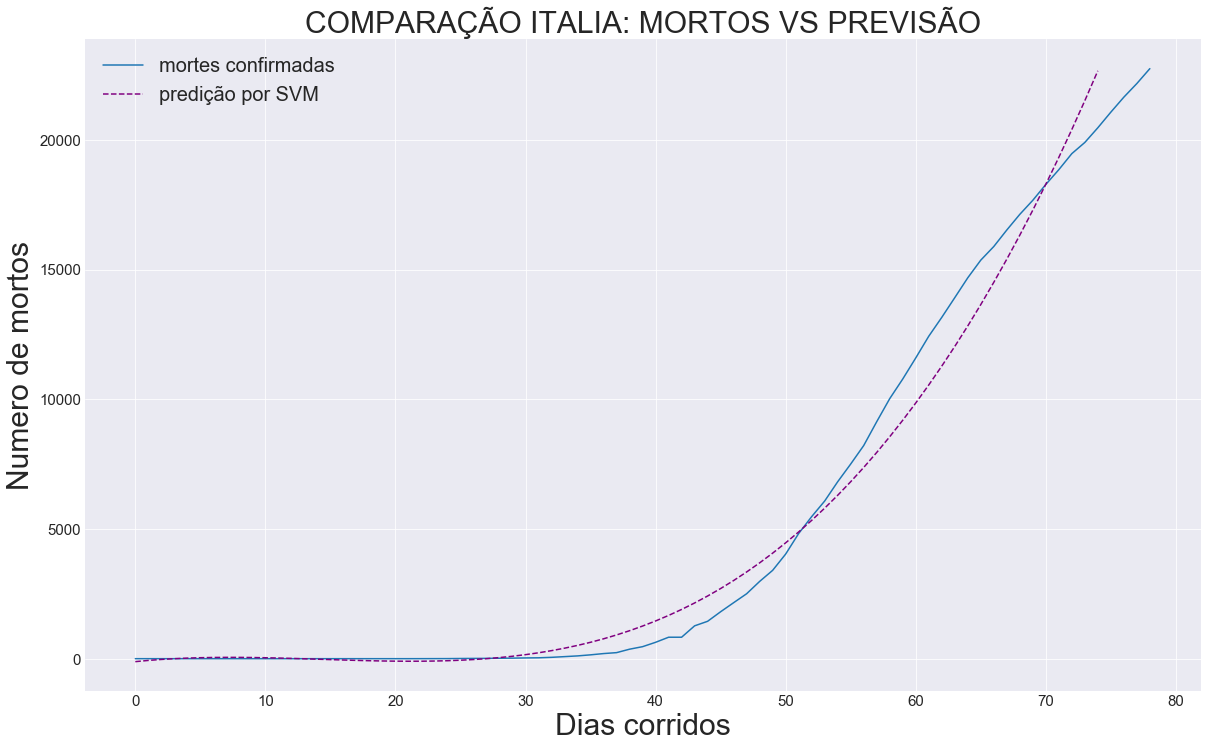

In [0]:
plt.figure(figsize=(20, 12))
plt.plot(dias_italia, mortes_italia)
plt.plot(futuro_italia[0:75],pred_mortes_italia[0:75], linestyle = 'dashed', color='purple')
plt.title('COMPARAÇÃO ITALIA: MORTOS VS PREVISÃO', size=30)
plt.xlabel('Dias corridos', size = 30)
plt.ylabel('Numero de mortos', size = 30)
plt.legend(['mortes confirmadas', 'predição por SVM'],  prop={'size': 20}, loc="upper left")


plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


In [0]:
 # predicao casos SUECIA
X_train, X_test, y_train, y_test = train_test_split(df_confirmados_suecia, target_confirmado_suecia, test_size=0.1, random_state=42)

params = {'C': [2], 'coef0': [0.0, 3.5], 'epsilon': [0.001], 'gamma': [0.5], 'kernel': ['poly'], 'max_iter': [-1], 'shrinking':[False]}
# o gridsearch esta implementando bruto em outro arquivo na maquina local, pois ele demorou mais de 24h para rodar
svr = SVR()
svm = GridSearchCV(svr, params,scoring='neg_mean_absolute_error', cv=10,return_train_score=False, n_jobs=-1, verbose=1 )
print('fitting...')
svm.fit(X_train,y_train)

fitting...
Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed: 24.2min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [2], 'coef0': [0.0, 3.5], 'epsilon': [0.001],
                         'gamma': [0.5], 'kernel': ['poly'], 'max_iter': [-1],
                         'shrinking': [False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_absolute_error', verbose=1)

In [0]:
pred_caso_suecia = svm.predict(futuro_suecia)

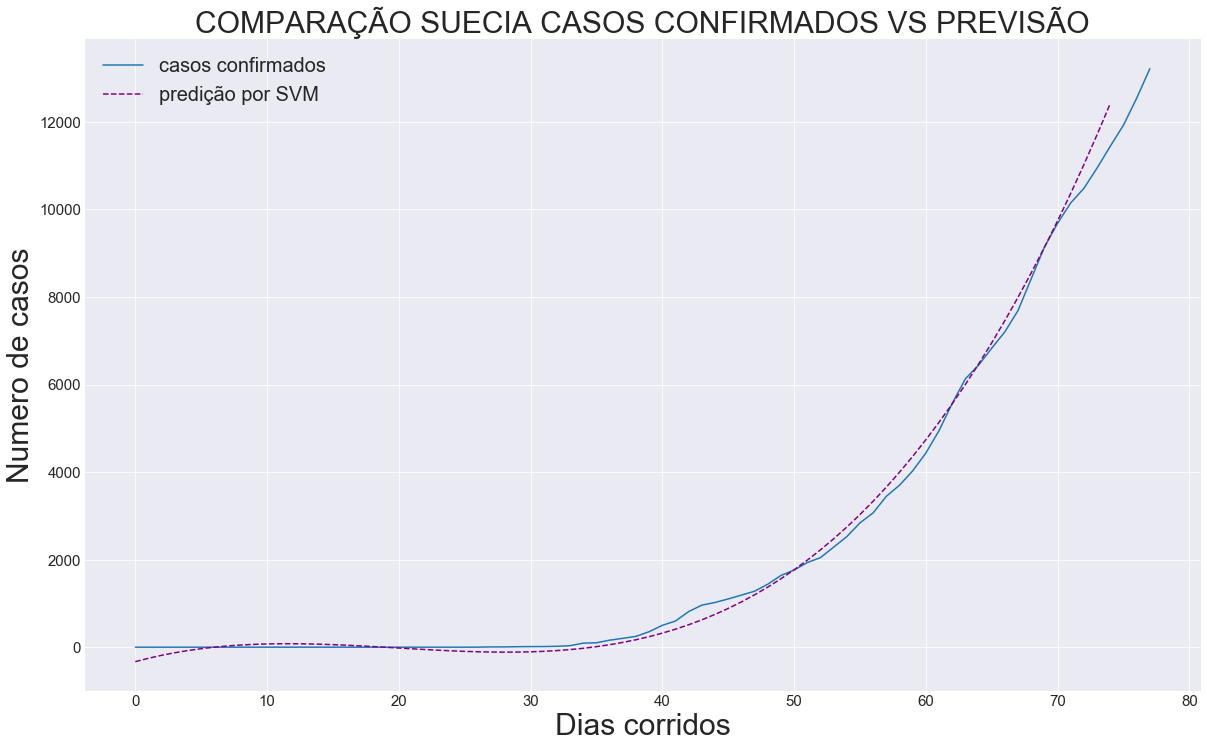

In [0]:
plt.figure(figsize=(20, 12))
plt.plot(dias_suecia, casos_suecia)
plt.plot(futuro_suecia[0:75],pred_caso_suecia[0:75], linestyle = 'dashed', color='purple')
plt.title('COMPARAÇÃO SUECIA CASOS CONFIRMADOS VS PREVISÃO', size=30)
plt.xlabel('Dias corridos', size = 30)
plt.ylabel('Numero de casos', size = 30)
plt.legend(['casos confirmados', 'predição por SVM'],  prop={'size': 20}, loc="upper left")


plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


In [0]:
 # predicao MORTES SUECIA
X_train, X_test, y_train, y_test = train_test_split(df_mortes_suecia, target_mortos_suecia, test_size=0.1, random_state=42)

params = {'C': [2], 'coef0': [0.0, 3.5], 'epsilon': [0.001], 'gamma': [0.5], 'kernel': ['poly'], 'max_iter': [-1], 'shrinking':[False]}
# o gridsearch esta implementando bruto em outro arquivo na maquina local, pois ele demorou mais de 24h para rodar
svr = SVR()
svm = GridSearchCV(svr, params,scoring='neg_mean_absolute_error', cv=10,return_train_score=False, n_jobs=-1, verbose=1 )
print('fitting...')
svm.fit(X_train,y_train)

fitting...
Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed: 33.8min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [2], 'coef0': [0.0, 3.5], 'epsilon': [0.001],
                         'gamma': [0.5], 'kernel': ['poly'], 'max_iter': [-1],
                         'shrinking': [False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_absolute_error', verbose=1)

In [0]:
pred_mortes_suecia = svm.predict(futuro_suecia)

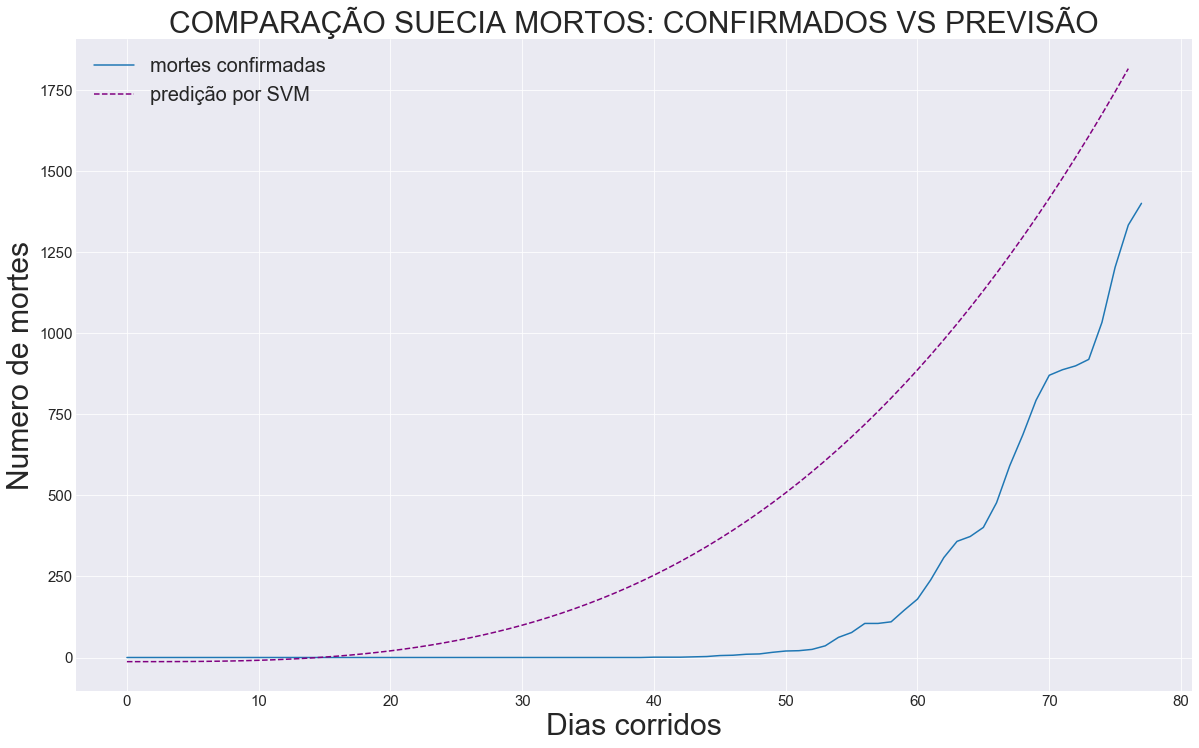

In [0]:
plt.figure(figsize=(20, 12))
plt.plot(dias_suecia, mortes_suecia)
plt.plot(futuro_suecia[0:77],pred_mortes_suecia[0:77], linestyle = 'dashed', color='purple')
plt.title('COMPARAÇÃO SUECIA MORTOS: CONFIRMADOS VS PREVISÃO', size=30)
plt.xlabel('Dias corridos', size = 30)
plt.ylabel('Numero de mortes', size = 30)
plt.legend(['mortes confirmadas', 'predição por SVM'],  prop={'size': 20}, loc="upper left")


plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


# Apresentação de Resultados

Nesta secao construiremos 8 dataframes, um de casos confirmados e um de mortes para cada pais. Nesses dataframes nos teremos os casos oficiais e os que nosso programa previu, e ele sera atualizado diretamente.
Alem desses dataframes iremos refazer os graficos feitos na secao de graficos, porem agora com as previsoes, para ver se o cenario dos paises mudam em relaçao um ao outro 

Abaixo a media de erro de nossa previsao para os casos 
confirmados do  brasil e a tabela com as previsoes, casos reais e a diferenca entre os dois.
por se tratar de previsoes, ha tabelas que nao ha diferencas ainda, pois nosso programa preve 40 dias a frente. 
ordem das tabelas:


1.  Confirmados Brasil
2.  Mortos Brasil
3.  Confirmados EUA
4.  Mortos EUA
5.  Confirmados Italia
6.  Mortos Italia
7.  Confirmados Suecia
8.  Mortos Suecia











In [0]:
index = ['previsoes', 'real', 'diferenca percentual', 'diferenca bruta']
pd.set_option('display.max_columns', 250)

In [0]:
colunas =[i for i in datas_futuras_br]
previsto = [round(i, 0) for i in pred_caso_br]
diferenca =[int(p) - int(r) for p,r in zip(pred_caso_br, casos_brasil)]
diferenca_percentual = [(int(p) / int(r))*100 if r != 0 else 0 for p,r in zip(diferenca, casos_brasil) ]
diferenca_percentual = [round(m, 2) for m in diferenca_percentual]
diferenca_percentual_formatada = [f'{i}%' for i in diferenca_percentual]
df_caso_br = pd.DataFrame([previsto[40:], casos_brasil[40:], diferenca_percentual_formatada[40:], diferenca[40:]],
                          columns=colunas[40:], index = index)


In [0]:
diferenca = np.array(diferenca[40:])
diferenca_percentual = np.array(diferenca_percentual[40:])
print(f"A media de erro bruto para casos confirmados no Brasil eh: {round(np.absolute(diferenca).mean(), 1 )}")
print(f'A media de erro percentual para casos confirmados no Brasil eh: {round(np.absolute(diferenca_percentual).mean(), 2)}%')

A media de erro bruto para casos confirmados no Brasil eh: 532.8
A media de erro percentual para casos confirmados no Brasil eh: 2.66%


In [0]:
print('CASOS CONFIRMADOS PARA O BRASIL: ')
pd.set_option('display.max_columns', 250)
df_caso_br

CASOS CONFIRMADOS PARA O BRASIL: 


,04/06/20,04/07/20,04/08/20,04/09/20,04/10/20,04/11/20,04/12/20,04/13/20,04/14/20,04/15/20,04/16/20,04/17/20,04/18/20,04/19/20,04/20/20,04/21/20,04/22/20,04/23/20,04/24/20,04/25/20,04/26/20,04/27/20,04/28/20,04/29/20,04/30/20,05/01/20,05/02/20,05/03/20,05/04/20,05/05/20,05/06/20,05/07/20,05/08/20,05/09/20,05/10/20,05/11/20,05/12/20,05/13/20,05/14/20,05/15/20,05/16/20,05/17/20,05/18/20,05/19/20,05/20/20,05/21/20,05/22/20,05/23/20,05/24/20,05/25/20,05/26/20,05/27/20
previsoes,12617,13971,15418,16960,18601,20343,22189,24143,26207,28384,30677,33090,35626.0,38286.0,41075.0,43996.0,47050.0,50242.0,53574.0,57050.0,60671.0,64442.0,68366.0,72444.0,76681.0,81079.0,85642.0,90371.0,95271.0,100344.0,105594.0,111022.0,116633.0,122429.0,128414.0,134589.0,140959.0,147526.0,154293.0,161264.0,168440.0,175826.0,183424.0,191237.0,199268.0,207521.0,215998.0,224702.0,233636.0,242803.0,252206.0,261848.0
real,12161,14034,16170,18092,19638,20727,22192,23430,25262,28320,30425,33682,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
diferenca percentual,3.74%,-0.45%,-4.66%,-6.26%,-5.29%,-1.86%,-0.02%,3.04%,3.74%,0.22%,0.83%,-1.76%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
diferenca bruta,455,-63,-753,-1132,-1038,-385,-4,712,944,63,252,-592,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
colunas =[i for i in datas_futuras_br]
previsto = [round(i, 0)  for i in pred_mortes_br]
diferenca =[int(p) - int(r) for p,r in zip(pred_mortes_br, mortes_brasil)]
diferenca_percentual = [(int(p) / int(r))*100 if r != 0 else 0 for p,r in zip(diferenca, mortes_brasil)]
diferenca_percentual = [round(m, 2) for m in diferenca_percentual]
diferenca_percentual_formatada = [f'{i}%' for i in diferenca_percentual]
df_morto_br = pd.DataFrame([previsto[40:], mortes_brasil[40:], diferenca_percentual_formatada[40:], diferenca[40:]], columns=colunas[40:], index = index)


In [0]:
diferenca = np.array(diferenca[40:])
diferenca_percentual = np.array(diferenca_percentual[40:])
print(f'A media de erro bruto para mortes no Brasil eh: {round(np.absolute(diferenca).mean(), 1 )}')
print(f'A media de erro percentual mortes no Brasil eh: {round (np.absolute(diferenca_percentual).mean() , 2)}%')

A media de erro bruto para mortes no Brasil eh: 51.7
A media de erro percentual mortes no Brasil eh: 4.58%


In [0]:
print('MORTES PARA O BRASIL: ')
df_morto_br

MORTES PARA O BRASIL: 


,04/06/20,04/07/20,04/08/20,04/09/20,04/10/20,04/11/20,04/12/20,04/13/20,04/14/20,04/15/20,04/16/20,04/17/20,04/18/20,04/19/20,04/20/20,04/21/20,04/22/20,04/23/20,04/24/20,04/25/20,04/26/20,04/27/20,04/28/20,04/29/20,04/30/20,05/01/20,05/02/20,05/03/20,05/04/20,05/05/20,05/06/20,05/07/20,05/08/20,05/09/20,05/10/20,05/11/20,05/12/20,05/13/20,05/14/20,05/15/20,05/16/20,05/17/20,05/18/20,05/19/20,05/20/20,05/21/20,05/22/20,05/23/20,05/24/20,05/25/20,05/26/20,05/27/20
previsoes,564,647,739,840,952,1074,1208,1354,1512,1685,1871,2073,2290.0,2524.0,2775.0,3045.0,3334.0,3643.0,3973.0,4325.0,4700.0,5098.0,5522.0,5971.0,6447.0,6951.0,7483.0,8046.0,8640.0,9266.0,9926.0,10620.0,11350.0,12116.0,12921.0,13766.0,14651.0,15578.0,16548.0,17563.0,18624.0,19732.0,20888.0,22095.0,23353.0,24665.0,26030.0,27452.0,28931.0,30468.0,32067.0,33727.0
real,564,686,819,950,1057,1124,1223,1328,1532,1736,1924,2141,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
diferenca percentual,0.0%,-5.69%,-9.77%,-11.58%,-10.03%,-4.45%,-1.31%,1.88%,-1.31%,-3.0%,-2.75%,-3.22%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
diferenca bruta,0,-39,-80,-110,-106,-50,-16,25,-20,-52,-53,-69,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
colunas =[i for i in datas_futuras_us]
previsto = [round(i, 0) for i in pred_caso_eua]
diferenca =[int(p) - int(r) for p,r in zip(pred_caso_eua, casos_eua)]
diferenca_percentual = [(int(p) / int(r))*100 if r !=0 else 0 for p,r in zip(diferenca, casos_eua)]
diferenca_percentual = [round(m, 2) for m in diferenca_percentual]
diferenca_percentual_formatada = [f'{i}%' for i in diferenca_percentual]
df_caso_eua = pd.DataFrame([previsto[75:], casos_eua[75:], diferenca_percentual_formatada[75:], diferenca[75:]],
                           columns=colunas[75:], index = index)


In [0]:
diferenca = np.array(diferenca[75:])
diferenca_percentual = np.array(diferenca_percentual[75:])
print(f'A media de erro bruto para casos confirmados nos EUA eh: {np.absolute(diferenca).mean()}')
print(f'A media de erro percentual para casos confirmados nos EUA eh: {round(np.absolute(diferenca_percentual).mean(), 2)}%')

A media de erro bruto para casos confirmados nos EUA eh: 16344.0
A media de erro percentual para casos confirmados nos EUA eh: 3.29%


In [0]:
print('CASOS CONFIRMADOS PARA OS ESTADOS UNIDOS: ')
df_caso_eua

CASOS CONFIRMADOS PARA OS ESTADOS UNIDOS: 


,04/06/20,04/07/20,04/08/20,04/09/20,04/10/20,04/11/20,04/12/20,04/13/20,04/14/20,04/15/20,04/16/20,04/17/20,04/18/20,04/19/20,04/20/20,04/21/20,04/22/20,04/23/20,04/24/20,04/25/20,04/26/20,04/27/20,04/28/20,04/29/20,04/30/20,05/01/20,05/02/20,05/03/20,05/04/20,05/05/20,05/06/20,05/07/20,05/08/20,05/09/20,05/10/20,05/11/20,05/12/20,05/13/20,05/14/20,05/15/20,05/16/20,05/17/20,05/18/20,05/19/20,05/20/20,05/21/20,05/22/20,05/23/20,05/24/20,05/25/20,05/26/20,05/27/20
previsoes,355981,381999,409113,437344,466712,497238,528944,561850,595978,631347,667980,705896,745118.0,785665.0,827559.0,870820.0,915471.0,961530.0,1009020.0,1057962.0,1108376.0,1160283.0,1213704.0,1268660.0,1325173.0,1383262.0,1442949.0,1504255.0,1567200.0,1631807.0,1698094.0,1766084.0,1835798.0,1907256.0,1980479.0,2055488.0,2132305.0,2210949.0,2291443.0,2373806.0,2458060.0,2544226.0,2632324.0,2722376.0,2814403.0,2908425.0,3004463.0,3102539.0,3202673.0,3304886.0,3409198.0,3515632.0
real,366667,396223,429052,461437,496535,526396,555313,580619,607670,636350,667801,699706,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
diferenca percentual,-2.91%,-3.59%,-4.65%,-5.22%,-6.01%,-5.54%,-4.75%,-3.23%,-1.92%,-0.79%,0.03%,0.88%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
diferenca bruta,-10687,-14224,-19939,-24094,-29824,-29158,-26369,-18769,-11693,-5003,178,6190,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
colunas =[i for i in datas_futuras_us]
previsto = [round(i, 0) for i in pred_mortes_eua]
diferenca =[int(p) - int(r) for p,r in zip(pred_mortes_eua, mortes_eua)]
diferenca_percentual = [(int(p) / int(r))*100 if r !=0 else 0 for p,r in zip(diferenca, mortes_eua)]
diferenca_percentual = [round(m, 2) for m in diferenca_percentual]
diferenca_percentual_formatada = [f'{i}%' for i in diferenca_percentual]
df_morto_eua = pd.DataFrame([previsto[75:], mortes_eua[75:], diferenca_percentual_formatada[75:], diferenca[75:]], 
                            columns=colunas[75:], index = index)


In [0]:
diferenca = np.array(diferenca[75:])
diferenca_percentual = np.array(diferenca_percentual[75:])
print(f'A media de erro bruto para mortes nos EUA eh: {round(np.absolute(diferenca).mean(), 0)}')
print(f'A media de erro percentual mortes nos EUA eh: {round(np.absolute(diferenca_percentual).mean(), 2)}%')

A media de erro bruto para mortes nos EUA eh: 2056.0
A media de erro percentual mortes nos EUA eh: 10.74%


In [0]:
print('MORTES PARA OS ESTADOS UNIDOS: ')
df_morto_eua

MORTES PARA OS ESTADOS UNIDOS: 


,04/06/20,04/07/20,04/08/20,04/09/20,04/10/20,04/11/20,04/12/20,04/13/20,04/14/20,04/15/20,04/16/20,04/17/20,04/18/20,04/19/20,04/20/20,04/21/20,04/22/20,04/23/20,04/24/20,04/25/20,04/26/20,04/27/20,04/28/20,04/29/20,04/30/20,05/01/20,05/02/20,05/03/20,05/04/20,05/05/20,05/06/20,05/07/20,05/08/20,05/09/20,05/10/20,05/11/20,05/12/20,05/13/20,05/14/20,05/15/20,05/16/20,05/17/20,05/18/20,05/19/20,05/20/20,05/21/20,05/22/20,05/23/20,05/24/20,05/25/20,05/26/20,05/27/20
previsoes,14512,15682,16905,18184,19519,20912,22363,23874,25446,27080,28778,30539,32367.0,34260.0,36222.0,38252.0,40352.0,42524.0,44767.0,47084.0,49476.0,51943.0,54487.0,57109.0,59810.0,62591.0,65453.0,68398.0,71427.0,74540.0,77739.0,81025.0,84399.0,87862.0,91416.0,95061.0,98799.0,102630.0,106557.0,110579.0,114699.0,118917.0,123234.0,127652.0,132172.0,136795.0,141521.0,146352.0,151290.0,156335.0,161489.0,166752.0
real,10783,12722,14695,16478,18586,20462,22019,23528,25831,28325,32916,36773,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
diferenca percentual,34.58%,23.26%,15.04%,10.35%,5.01%,2.19%,1.56%,1.47%,-1.49%,-4.4%,-12.57%,-16.95%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
diferenca bruta,3729,2959,2210,1705,932,449,344,346,-385,-1245,-4139,-6234,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
colunas =[i for i in datas_futuras_it]
previsto = [round(i, 0) for i in pred_caso_italia]
diferenca =[int(p) - int(r) for p,r in zip(pred_caso_italia, casos_italia)]
diferenca_percentual = [(int(p) / int(r))*100 if r !=0 else 0 for p,r in zip(diferenca, casos_italia)]
diferenca_percentual = [round(m, 2) for m in diferenca_percentual]
diferenca_percentual_formatada = [f'{i}%' for i in diferenca_percentual]
df_caso_italia = pd.DataFrame([previsto[67:], casos_italia[67:], diferenca_percentual_formatada[67:], diferenca[67:]], 
                              columns=colunas[67:], index = index)

In [0]:
diferenca = np.array(diferenca[67:])
diferenca_percentual = np.array(diferenca_percentual[67:])
print(f'A media de erro bruto para casos confirmados na Italia eh: {round(np.absolute(diferenca).mean(), 0)}')
print(f'A media de erro percentual para casos confirmados na Italia eh: {round(np.absolute(diferenca_percentual).mean(), 2)}%')

A media de erro bruto para casos confirmados na Italia eh: 9758.0
A media de erro percentual para casos confirmados na Italia eh: 6.05%


In [0]:
print('CASOS CONFIRMADOS PARA A ITALIA: ')
df_caso_italia

CASOS CONFIRMADOS PARA A ITALIA: 


,04/06/20,04/07/20,04/08/20,04/09/20,04/10/20,04/11/20,04/12/20,04/13/20,04/14/20,04/15/20,04/16/20,04/17/20,04/18/20,04/19/20,04/20/20,04/21/20,04/22/20,04/23/20,04/24/20,04/25/20,04/26/20,04/27/20,04/28/20,04/29/20,04/30/20,05/01/20,05/02/20,05/03/20,05/04/20,05/05/20,05/06/20,05/07/20,05/08/20,05/09/20,05/10/20,05/11/20,05/12/20,05/13/20,05/14/20,05/15/20,05/16/20,05/17/20,05/18/20,05/19/20,05/20/20,05/21/20,05/22/20,05/23/20,05/24/20,05/25/20,05/26/20,05/27/20
previsoes,125814,131621,137583,143701,149978,156415,163014,169776,176703,183797,191059,198491,206094.0,213871.0,221822.0,229950.0,238256.0,246742.0,255409.0,264259.0,273294.0,282515.0,291924.0,301523.0,311313.0,321295.0,331472.0,341846.0,352417.0,363187.0,374158.0,385332.0,396711.0,408295.0,420087.0,432088.0,444300.0,456724.0,469363.0,482217.0,495289.0,508579.0,522091.0,535825.0,549782.0,563966.0,578376.0,593015.0,607885.0,622987.0,638323.0,653894.0
real,132547,135586,139422,143626,147577,152271,156363,159516,162488,165155,168941,172434,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
diferenca percentual,-5.08%,-2.93%,-1.32%,0.05%,1.63%,2.72%,4.25%,6.43%,8.75%,11.29%,13.09%,15.11%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
diferenca bruta,-6733,-3966,-1840,75,2401,4144,6650,10260,14215,18641,22117,26056,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
colunas =[i for i in datas_futuras_it]
previsto = [round(i, 0) for i in pred_mortes_italia]
diferenca =[int(p) - int(r) for p,r in zip(pred_mortes_italia, mortes_italia)]
diferenca_percentual = [(int(p) / int(r))*100 if r !=0 else 0 for p,r in zip(diferenca, mortes_italia)]
diferenca_percentual = [round(m, 2) for m in diferenca_percentual]
diferenca_percentual_formatada = [f'{i}%' for i in diferenca_percentual]
df_morto_italia = pd.DataFrame([previsto[67:], mortes_italia[67:], diferenca_percentual_formatada[67:], diferenca[67:]], 
                               columns=colunas[67:], index = index)

In [0]:
diferenca = np.array(diferenca[67:])
diferenca_percentual = np.array(diferenca_percentual[67:])
print(f'A media de erro bruto para mortes na Italia eh: {round(np.absolute(diferenca).mean() ,0)}')
print(f'A media de erro percentual mortes na Italia eh: {round(np.absolute(diferenca_percentual).mean(),2)}%')

A media de erro bruto para mortes na Italia eh: 1905.0
A media de erro percentual mortes na Italia eh: 9.12%


In [0]:
print('MORTES CONFIRMADOS DA ITALIA: ')
df_morto_italia

MORTES CONFIRMADOS DA ITALIA: 


,04/06/20,04/07/20,04/08/20,04/09/20,04/10/20,04/11/20,04/12/20,04/13/20,04/14/20,04/15/20,04/16/20,04/17/20,04/18/20,04/19/20,04/20/20,04/21/20,04/22/20,04/23/20,04/24/20,04/25/20,04/26/20,04/27/20,04/28/20,04/29/20,04/30/20,05/01/20,05/02/20,05/03/20,05/04/20,05/05/20,05/06/20,05/07/20,05/08/20,05/09/20,05/10/20,05/11/20,05/12/20,05/13/20,05/14/20,05/15/20,05/16/20,05/17/20,05/18/20,05/19/20,05/20/20,05/21/20,05/22/20,05/23/20,05/24/20,05/25/20,05/26/20,05/27/20
previsoes,15398,16325,17288,18287,19323,20397,21509,22661,23852,25083,26356,27670,29027.0,30427.0,31870.0,33358.0,34891.0,36470.0,38095.0,39767.0,41487.0,43255.0,45073.0,46940.0,48857.0,50826.0,52846.0,54918.0,57044.0,59223.0,61457.0,63746.0,66090.0,68491.0,70949.0,73464.0,76038.0,78671.0,81363.0,84116.0,86930.0,89806.0,92744.0,95745.0,98810.0,101939.0,105133.0,108392.0,111719.0,115112.0,118572.0,122101.0
real,16523,17127,17669,18279,18849,19468,19899,20465,21067,21645,22170,22745,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
diferenca percentual,-6.81%,-4.69%,-2.16%,0.04%,2.51%,4.77%,8.09%,10.73%,13.21%,15.88%,18.88%,21.65%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
diferenca bruta,-1125,-803,-382,7,473,928,1610,2195,2784,3438,4185,4925,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
colunas =[i for i in datas_futuras_su]
previsto = [round(i, 0) for i in pred_caso_suecia]
diferenca =[int(p) - int(r) for p,r in zip(pred_caso_suecia, casos_suecia)]
diferenca_percentual = [(int(p) / int(r))*100 if r !=0 else 0 for p,r in zip(diferenca, casos_suecia)]
diferenca_percentual = [round(m, 2) for m in diferenca_percentual]
diferenca_percentual_formatada = [f'{i}%' for i in diferenca_percentual]
df_caso_suecia = pd.DataFrame([previsto[66:], casos_suecia[66:], diferenca_percentual_formatada[66:], diferenca[66:]],
                              columns=colunas[66:],  index = index)

In [0]:
diferenca = np.array(diferenca[66:])
diferenca_percentual = np.array(diferenca_percentual[67:])
print(f'A media de erro bruto para casos confirmados na Suecia eh: {round(np.absolute(diferenca).mean(), 0)}')
print(f'A media de erro percentual para casos confirmados na Suecia eh: {round(np.absolute(diferenca_percentual).mean(), 2)}%')

A media de erro bruto para casos confirmados na Suecia eh: 614.0
A media de erro percentual para casos confirmados na Suecia eh: 5.61%


In [0]:
print('CASOS CONFIRMADOS PARA A SUECIA: ')
df_caso_suecia

CASOS CONFIRMADOS PARA A SUECIA: 


,04/06/20,04/07/20,04/08/20,04/09/20,04/10/20,04/11/20,04/12/20,04/13/20,04/14/20,04/15/20,04/16/20,04/17/20,04/18/20,04/19/20,04/20/20,04/21/20,04/22/20,04/23/20,04/24/20,04/25/20,04/26/20,04/27/20,04/28/20,04/29/20,04/30/20,05/01/20,05/02/20,05/03/20,05/04/20,05/05/20,05/06/20,05/07/20,05/08/20,05/09/20,05/10/20,05/11/20,05/12/20,05/13/20,05/14/20,05/15/20,05/16/20,05/17/20,05/18/20,05/19/20,05/20/20,05/21/20,05/22/20,05/23/20,05/24/20,05/25/20,05/26/20,05/27/20
previsoes,7463,7996,8552,9133,9739,10371,11028,11711,12421,13159,13925,14719,15542.0,16394.0,17276.0,18189.0,19133.0,20108.0,21115.0,22154.0,23226.0,24332.0,25472.0,26646.0,27855.0,29100.0,30380.0,31698.0,33052.0,34443.0,35873.0,37341.0,38848.0,40395.0,41982.0,43609.0,45277.0,46987.0,48739.0,50533.0,52371.0,54252.0,56177.0,58146.0,60161.0,62222.0,64328.0,66481.0,68681.0,70929.0,73225.0,75570.0
real,7206,7693,8419,9141,9685,10151,10483,10948,11445,11927,12540,13216,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
diferenca percentual,3.55%,3.93%,1.58%,-0.09%,0.56%,2.16%,5.19%,6.97%,8.53%,10.33%,11.04%,11.37%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
diferenca bruta,256,302,133,-8,54,219,544,763,976,1232,1384,1502,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
colunas =[i for i in datas_futuras_su]
previsto = [round(i, 0) for i in pred_mortes_suecia]
diferenca =[int(p) - int(r) for p,r in zip(pred_mortes_suecia, mortes_suecia)]
diferenca_percentual = [(int(p) / int(r))*100 if r !=0 else 0 for p,r in zip(diferenca, mortes_suecia)]
diferenca_percentual = [round(m, 2) for m in diferenca_percentual]
diferenca_percentual_formatada = [f'{i}%' for i in diferenca_percentual]
df_morto_suecia = pd.DataFrame([previsto[66:], mortes_suecia[66:],  diferenca_percentual_formatada[66:], diferenca[66:]],
                               columns=colunas[66:], index = index)

In [0]:
diferenca = np.array(diferenca[66:])
diferenca_percentual = np.array(diferenca_percentual[67:])
print(f'A media de erro bruto para mortes na Suecia eh: {round(np.absolute(diferenca).mean(),0)}')
print(f'A media de erro percentual mortes na Suecia eh: {round(np.absolute(diferenca_percentual).mean(),2)}%')

A media de erro bruto para mortes na Suecia eh: 595.0
A media de erro percentual mortes na Suecia eh: 65.69%


In [0]:
print('MORTES SUECIA: ')
df_morto_suecia

MORTES SUECIA: 


,04/06/20,04/07/20,04/08/20,04/09/20,04/10/20,04/11/20,04/12/20,04/13/20,04/14/20,04/15/20,04/16/20,04/17/20,04/18/20,04/19/20,04/20/20,04/21/20,04/22/20,04/23/20,04/24/20,04/25/20,04/26/20,04/27/20,04/28/20,04/29/20,04/30/20,05/01/20,05/02/20,05/03/20,05/04/20,05/05/20,05/06/20,05/07/20,05/08/20,05/09/20,05/10/20,05/11/20,05/12/20,05/13/20,05/14/20,05/15/20,05/16/20,05/17/20,05/18/20,05/19/20,05/20/20,05/21/20,05/22/20,05/23/20,05/24/20,05/25/20,05/26/20,05/27/20
previsoes,1184,1240,1297,1355,1416,1478,1541,1607,1675,1744,1815,1888,1963.0,2040.0,2119.0,2200.0,2283.0,2368.0,2455.0,2545.0,2636.0,2729.0,2825.0,2923.0,3023.0,3125.0,3230.0,3337.0,3446.0,3558.0,3671.0,3788.0,3907.0,4028.0,4151.0,4278.0,4406.0,4538.0,4671.0,4808.0,4947.0,5089.0,5233.0,5380.0,5530.0,5682.0,5838.0,5996.0,6157.0,6320.0,6487.0,6657.0
real,477,591,687,793,870,887,899,919,1033,1203,1333,1400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
diferenca percentual,148.22%,109.64%,88.65%,70.87%,62.64%,66.52%,71.41%,74.86%,62.05%,44.89%,36.16%,34.86%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
diferenca bruta,707,648,609,562,545,590,642,688,641,540,482,488,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


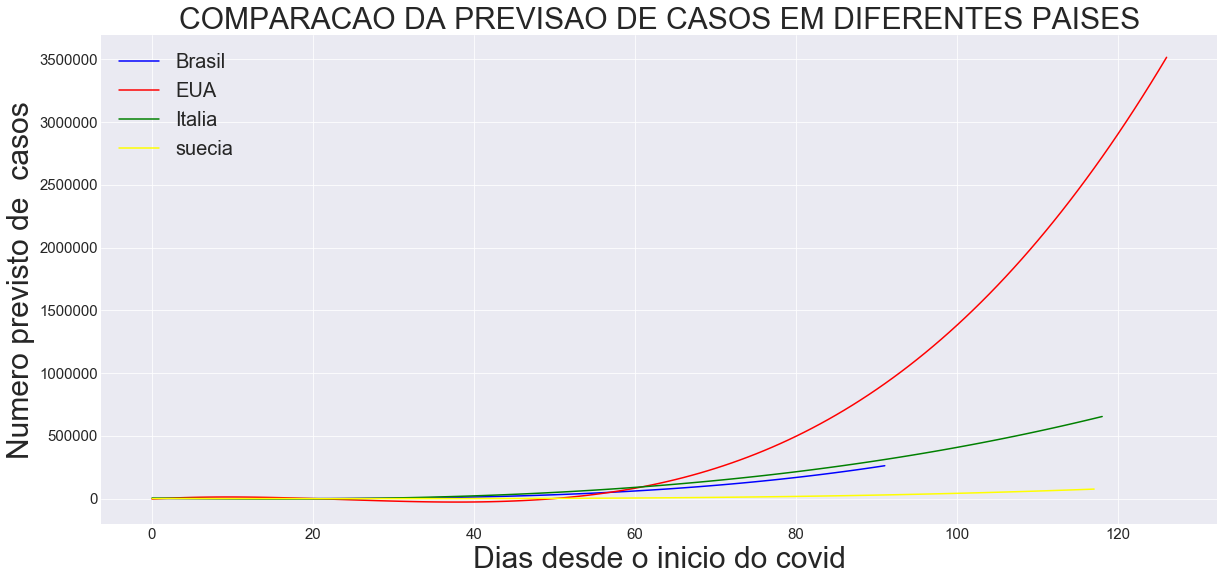

In [0]:
plt.figure(figsize=(20, 9))
plt.plot(futuro_brasil, pred_caso_br, color='blue')
plt.plot(futuro_eua, pred_caso_eua, color='red')
plt.plot(futuro_italia, pred_caso_italia, color='green')
plt.plot(futuro_suecia, pred_caso_suecia, color='yellow')

plt.title('COMPARACAO DA PREVISAO DE CASOS EM DIFERENTES PAISES', size=30)
plt.xlabel('Dias desde o inicio do covid', size = 30)
plt.ylabel('Numero previsto de  casos', size = 30)
plt.legend(['Brasil', 'EUA','Italia', 'suecia'],  prop={'size': 20}, loc="upper left")


plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


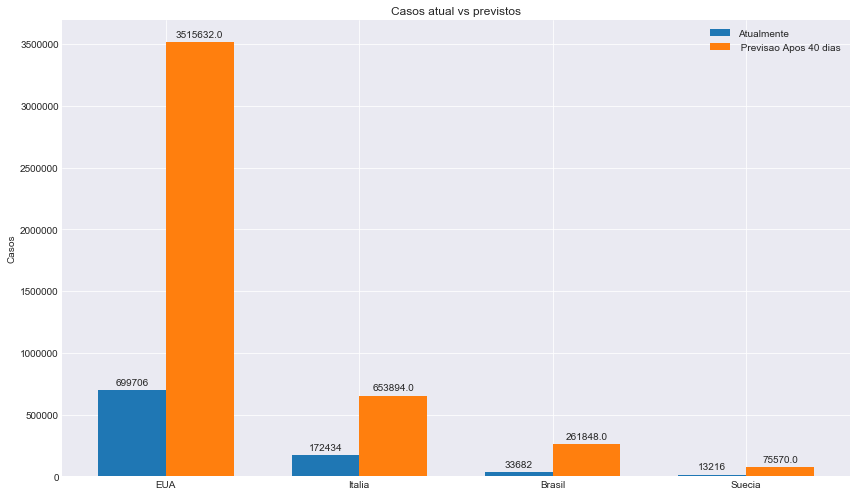

In [0]:
labels = ['EUA', 'Italia', 'Brasil', 'Suecia']
atualmente = [confirmados_eua,confirmados_italia,confirmados_brasil,confirmados_suecia]
apos_40 = [pred_caso_eua[-1], pred_caso_italia[-1], pred_caso_br[-1],  pred_caso_suecia[-1]]
apos_40 = [round(m, 0) for m in apos_40]
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 7))
rects1 = ax.bar(x - width/2, atualmente, width, label='Atualmente')
rects2 = ax.bar(x + width/2, apos_40, width, label=' Previsao Apos 40 dias')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Casos')
ax.set_title('Casos atual vs previstos')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
fig.tight_layout()
plt.show()

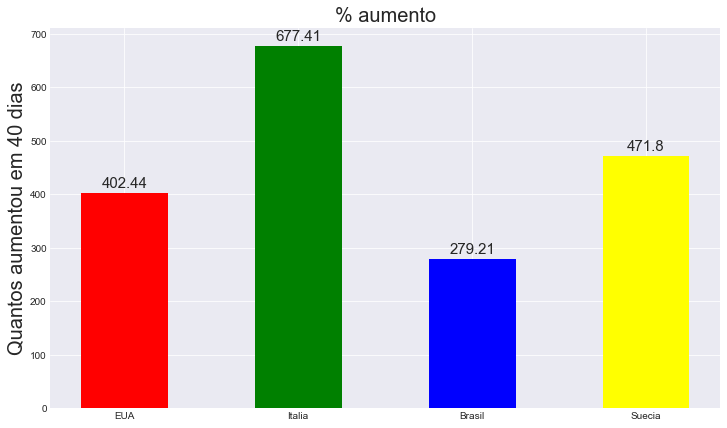

In [0]:
eua_porc = round(((pred_caso_eua[-1] - confirmados_eua)/ confirmados_eua)*100 , 2)
br_porc =  round(((pred_caso_br[-1] - confirmados_brasil)/ confirmados_brasil)*100, 2)
it_porc =  round(((pred_caso_italia[-1] - confirmados_italia)/ confirmados_italia)*100, 2)
su_porc =  round(((pred_caso_suecia[-1] - confirmados_suecia)/ confirmados_suecia)*100, 2)


fig = plt.figure(figsize=(12, 7))
paises = ['EUA', 'Italia', 'Brasil', 'Suecia']
numeros = [eua_porc,br_porc,it_porc,su_porc]
rects = plt.bar(paises,numeros, align='center', color=['red', 'green', 'blue', 'yellow'], width=0.5)

ax = rects.patches
for rect, label in zip(ax, numeros):
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height + 5, label,
            ha='center', va='bottom', fontsize=15)
    
plt.ylabel('Quantos aumentou em 40 dias', size = 20)
plt.title('% aumento', size=20)
plt.show()

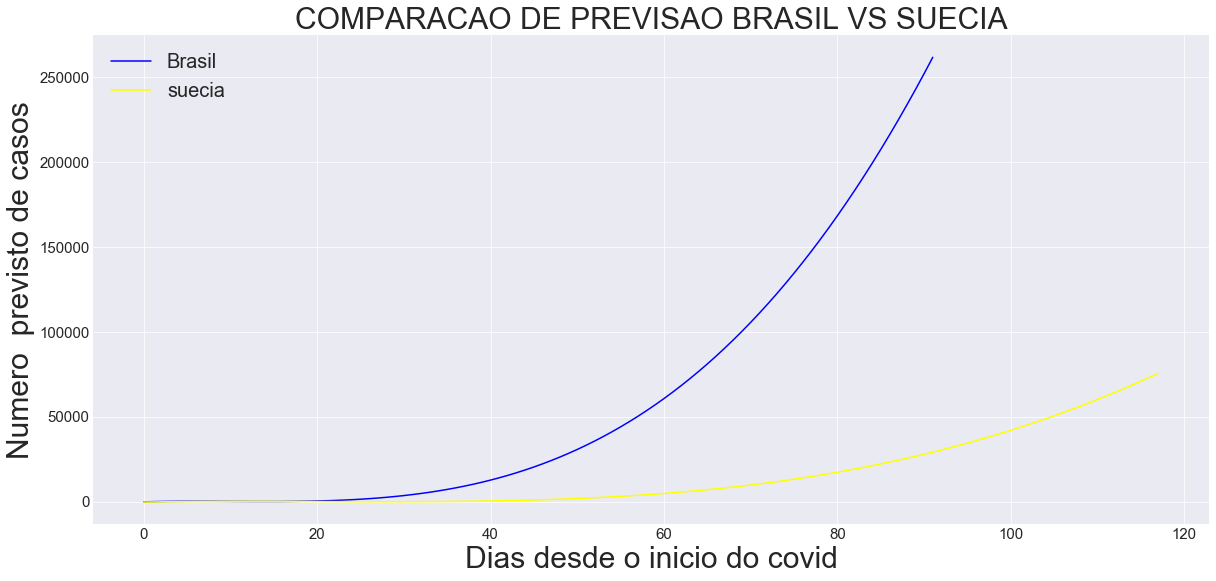

In [0]:
plt.figure(figsize=(20, 9))
plt.plot(futuro_brasil, pred_caso_br, color='blue')
plt.plot(futuro_suecia, pred_caso_suecia, color='yellow')


plt.title('COMPARACAO DE PREVISAO BRASIL VS SUECIA', size=30)
plt.xlabel('Dias desde o inicio do covid', size = 30)
plt.ylabel('Numero  previsto de casos', size = 30)
plt.legend(['Brasil', 'suecia'],  prop={'size': 20}, loc="upper left")


plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


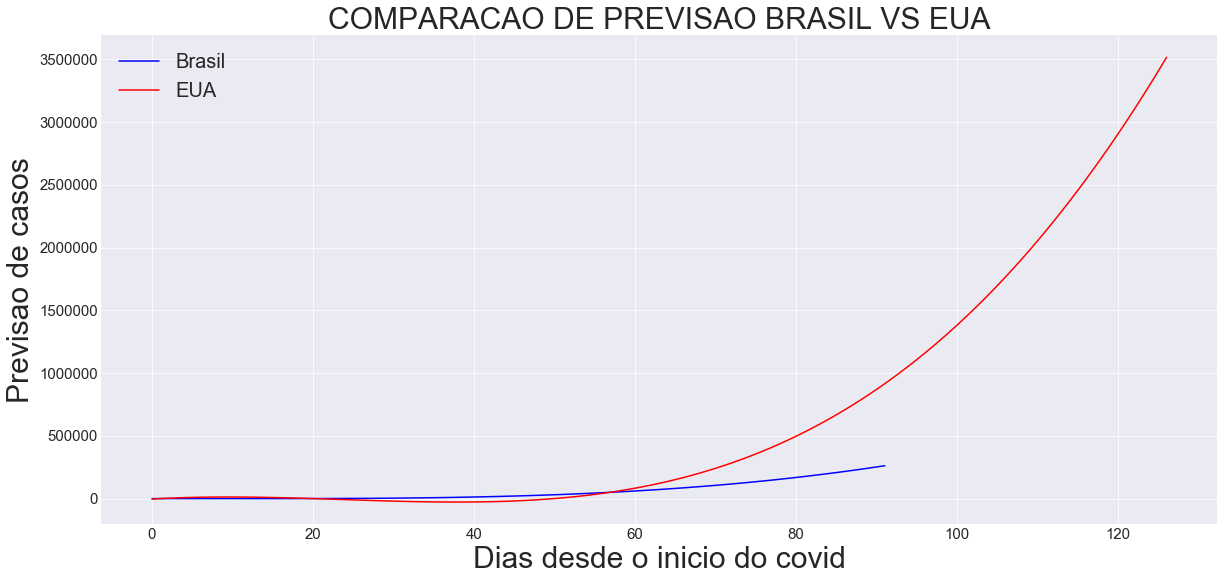

In [0]:
plt.figure(figsize=(20, 9))
plt.plot(futuro_brasil, pred_caso_br, color='blue')
plt.plot(futuro_eua, pred_caso_eua, color='red')

plt.title('COMPARACAO DE PREVISAO BRASIL VS EUA', size=30)
plt.xlabel('Dias desde o inicio do covid', size = 30)
plt.ylabel('Previsao de casos', size = 30)
plt.legend(['Brasil', 'EUA'],  prop={'size': 20}, loc="upper left")


plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


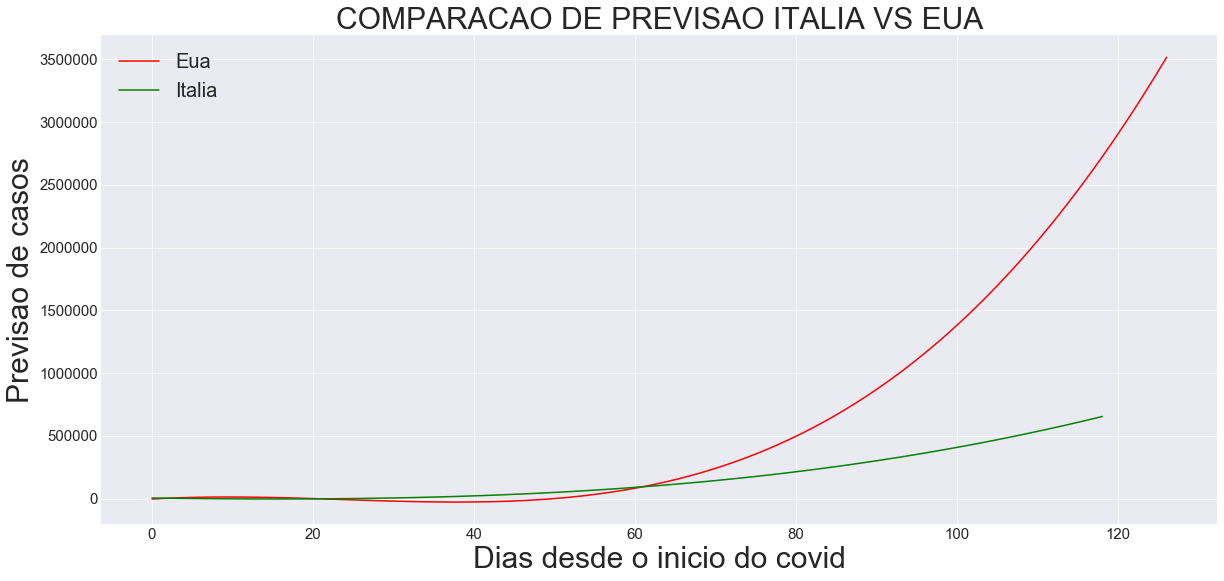

In [0]:
plt.figure(figsize=(20, 9))
plt.plot(futuro_eua, pred_caso_eua, color='red')
plt.plot(futuro_italia, pred_caso_italia, color='green')


plt.title('COMPARACAO DE PREVISAO ITALIA VS EUA', size=30)
plt.xlabel('Dias desde o inicio do covid', size = 30)
plt.ylabel('Previsao de casos', size = 30)
plt.legend(['Eua', 'Italia'],  prop={'size': 20}, loc="upper left")


plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


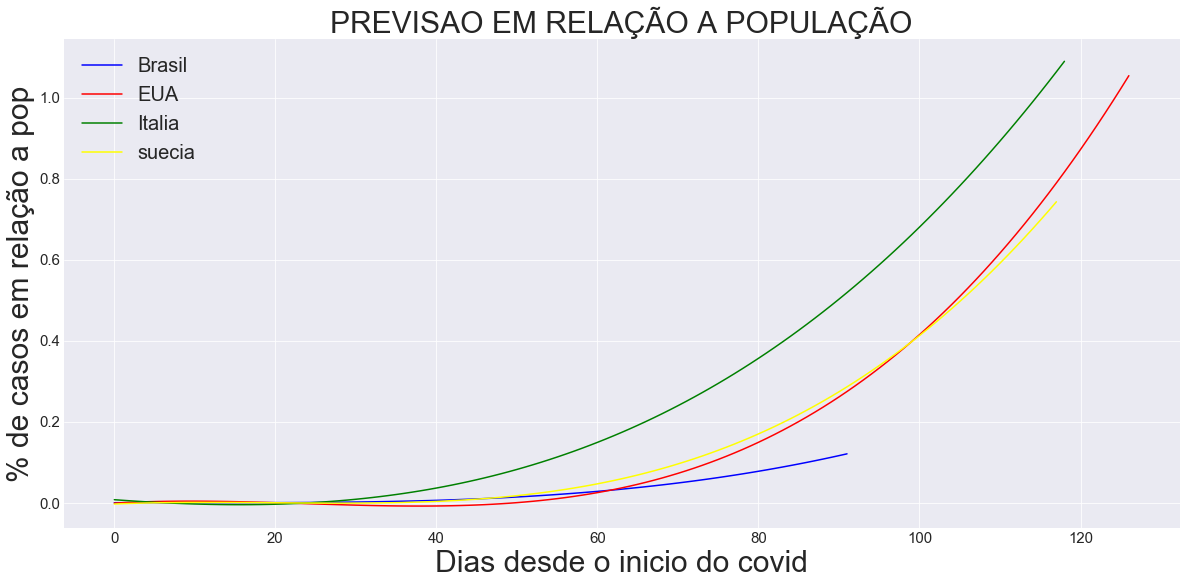

In [0]:
eua_porc = []
br_porc = []
it_porc = []
su_porc = []

for i in pred_caso_eua:
  porc = (i / 333545145)*100
  eua_porc.append(porc)
for i in pred_caso_br:
  porc = (i / 217089238)*100
  br_porc.append(porc)
for i in pred_caso_italia:
  porc = (i / 60017348)*100
  it_porc.append(porc)
for i in pred_caso_suecia:
  porc = (i / 10174790)*100
  su_porc.append(porc)

plt.figure(figsize=(20, 9))
plt.plot(futuro_brasil, br_porc, color='blue')
plt.plot(futuro_eua, eua_porc, color='red')
plt.plot(futuro_italia, it_porc, color='green')
plt.plot(futuro_suecia, su_porc, color='yellow')

plt.title('PREVISAO EM RELAÇÃO A POPULAÇÃO', size=30)
plt.xlabel('Dias desde o inicio do covid', size = 30)
plt.ylabel('% de casos em relação a pop', size = 30)
plt.legend(['Brasil', 'EUA','Italia', 'suecia'],  prop={'size': 20}, loc="upper left")


plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


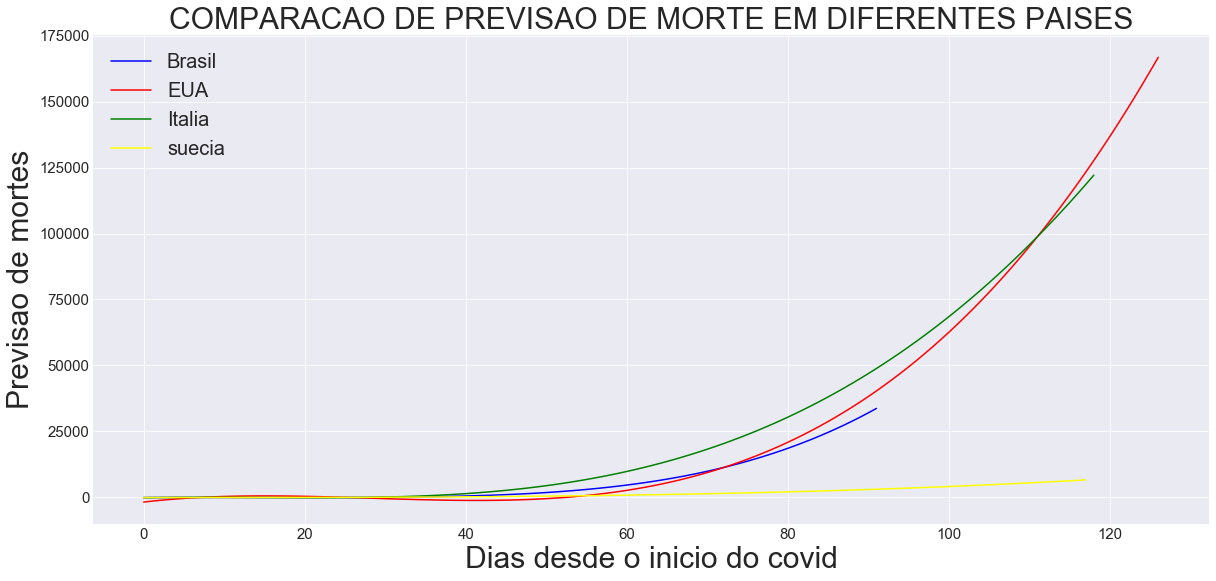

In [0]:
plt.figure(figsize=(20, 9))
plt.plot(futuro_brasil, pred_mortes_br, color='blue')
plt.plot(futuro_eua, pred_mortes_eua, color='red')
plt.plot(futuro_italia, pred_mortes_italia, color='green')
plt.plot(futuro_suecia, pred_mortes_suecia , color='yellow')

plt.title('COMPARACAO DE PREVISAO DE MORTE EM DIFERENTES PAISES', size=30)
plt.xlabel('Dias desde o inicio do covid', size = 30)
plt.ylabel('Previsao de mortes', size = 30)
plt.legend(['Brasil', 'EUA','Italia', 'suecia'],  prop={'size': 20}, loc="upper left")


plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


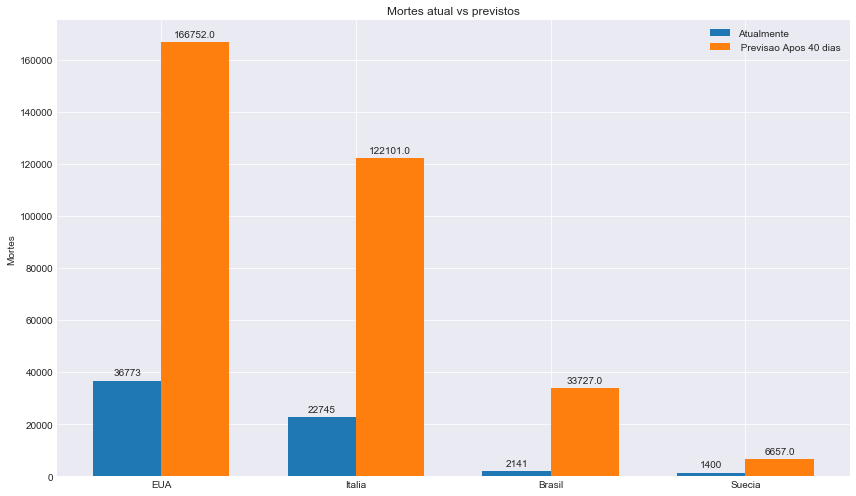

In [0]:
labels = ['EUA', 'Italia', 'Brasil', 'Suecia']
atualmente = [mortos_eua, mortos_italia, mortos_brasil, mortos_suecia]
apos_40 = [pred_mortes_eua[-1], pred_mortes_italia[-1], pred_mortes_br[-1],  pred_mortes_suecia[-1]]
apos_40 = [round(m, 0) for m in apos_40]
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 7))
rects1 = ax.bar(x - width/2, atualmente, width, label='Atualmente')
rects2 = ax.bar(x + width/2, apos_40, width, label=' Previsao Apos 40 dias')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Mortes')
ax.set_title('Mortes atual vs previstos')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
fig.tight_layout()
plt.show()

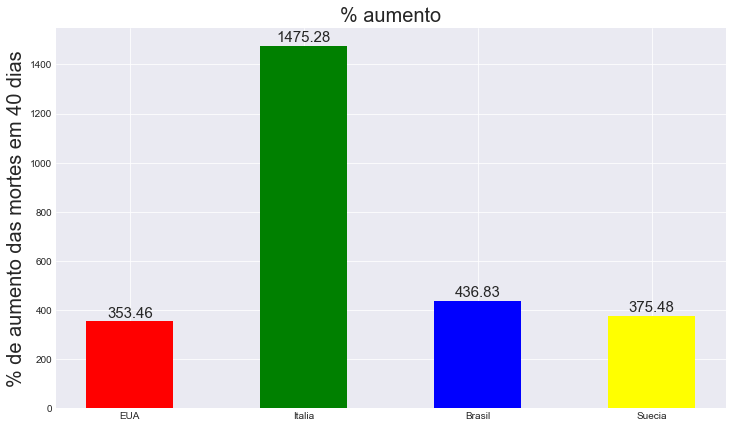

In [0]:
eua_porc = round(((pred_mortes_eua[-1] - mortos_eua)/ mortos_eua)*100 , 2)
br_porc =  round(((pred_mortes_br[-1] - mortos_brasil)/ mortos_brasil)*100, 2)
it_porc =  round(((pred_mortes_italia[-1] - mortos_italia)/ mortos_italia)*100, 2)
su_porc =  round(((pred_mortes_suecia[-1] - mortos_suecia)/ mortos_suecia)*100, 2)


fig = plt.figure(figsize=(12, 7))
paises = ['EUA', 'Italia', 'Brasil', 'Suecia']
numeros = [eua_porc,br_porc,it_porc,su_porc]
rects = plt.bar(paises,numeros, align='center', color=['red', 'green', 'blue', 'yellow'], width=0.5)

ax = rects.patches
for rect, label in zip(ax, numeros):
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height + 5, label,
            ha='center', va='bottom', fontsize=15)
    
plt.ylabel('% de aumento das mortes em 40 dias', size = 20)
plt.title('% aumento', size=20)
plt.show()

<Figure size 864x504 with 0 Axes>

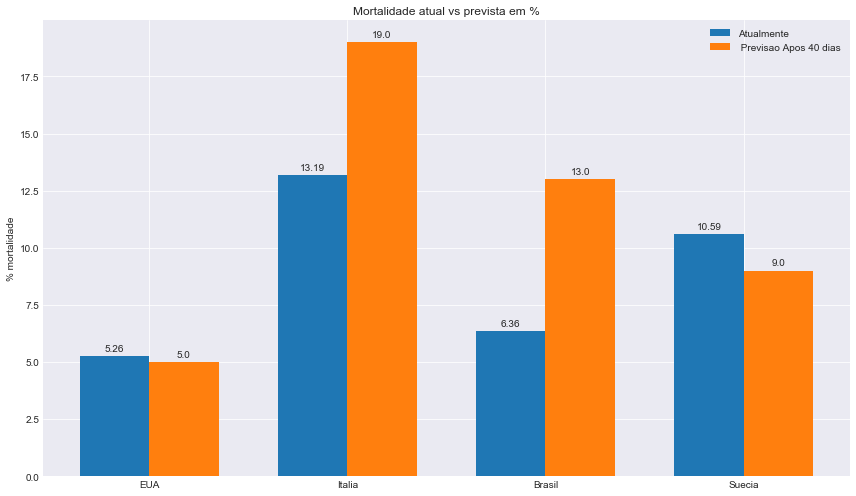

In [0]:
fig = plt.figure(figsize=(12, 7))
labels = ['EUA', 'Italia', 'Brasil', 'Suecia']
atualmente = [(mortos_eua/confirmados_eua)*100, (mortos_italia/confirmados_italia) *100, 
           (mortos_brasil/confirmados_brasil)*100, (mortos_suecia/confirmados_suecia)*100]
atualmente = [round(num, 2) for num in atualmente]
apos_40 = [(pred_mortes_eua[-1]/pred_caso_eua[-1])*100, (pred_mortes_italia[-1]/pred_caso_italia[-1])*100,
           (pred_mortes_br[-1]/ pred_caso_br[-1])*100, (pred_mortes_suecia[-1]/pred_caso_suecia[-1])*100]
apos_40 = [round(m, 0) for m in apos_40]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 7))
rects1 = ax.bar(x - width/2, atualmente, width, label='Atualmente')
rects2 = ax.bar(x + width/2, apos_40, width, label=' Previsao Apos 40 dias')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('% mortalidade')
ax.set_title('Mortalidade atual vs prevista em %')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
fig.tight_layout()
plt.show()

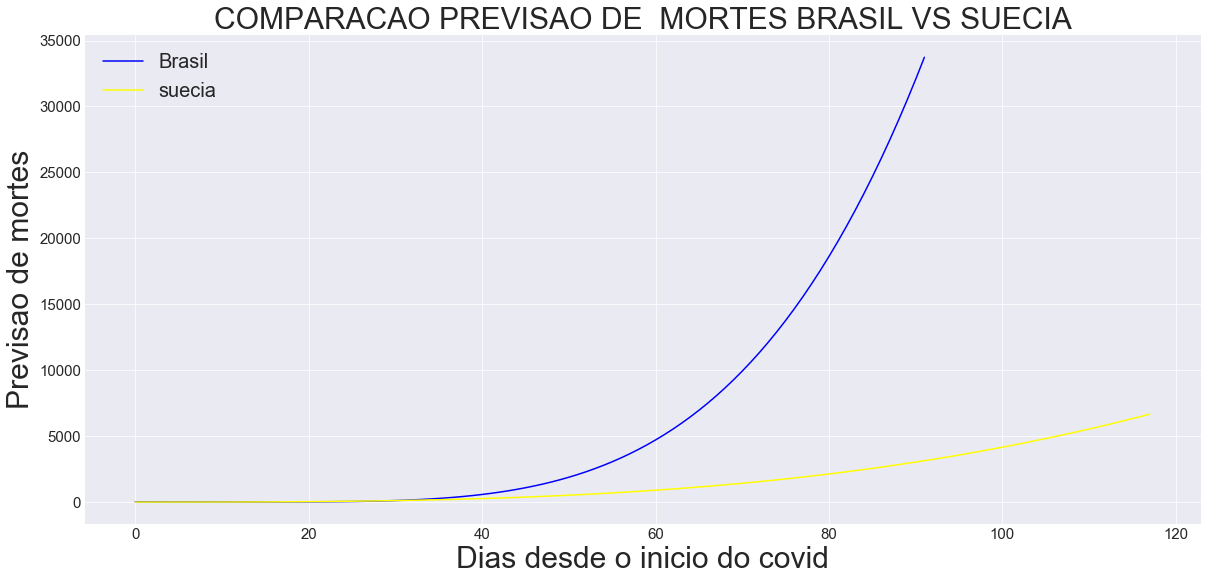

In [0]:
plt.figure(figsize=(20, 9))
plt.plot(futuro_brasil, pred_mortes_br, color='blue')
plt.plot(futuro_suecia, pred_mortes_suecia , color='yellow')

plt.title('COMPARACAO PREVISAO DE  MORTES BRASIL VS SUECIA', size=30)
plt.xlabel('Dias desde o inicio do covid', size = 30)
plt.ylabel('Previsao de mortes', size = 30)
plt.legend(['Brasil', 'suecia'],  prop={'size': 20}, loc="upper left")


plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


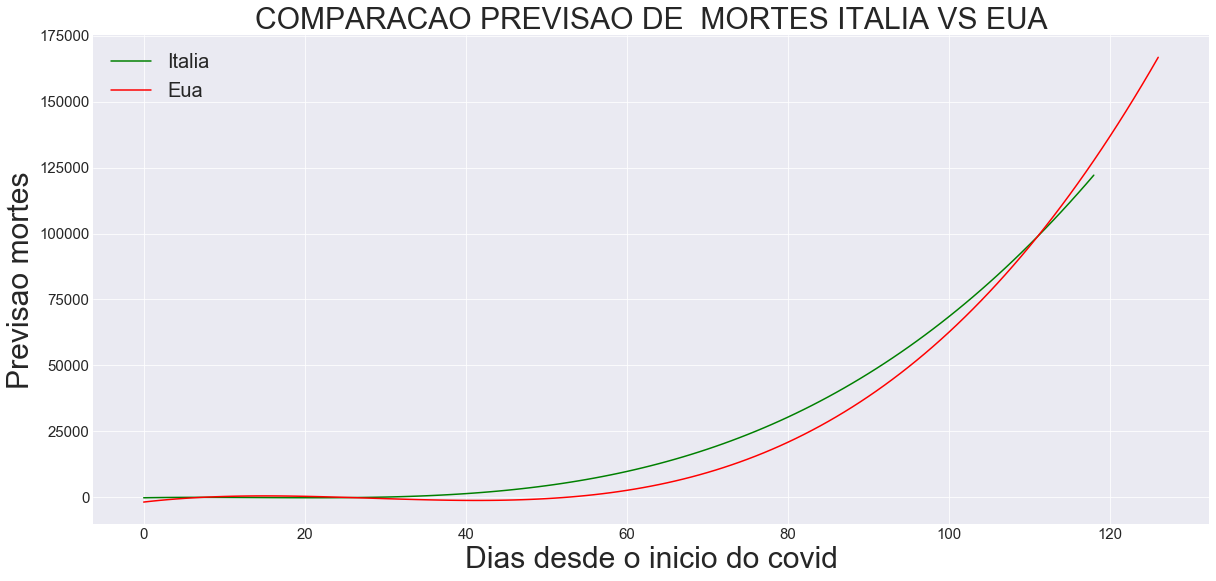

In [0]:
plt.figure(figsize=(20, 9))
plt.plot(futuro_italia, pred_mortes_italia, color='green')
plt.plot(futuro_eua, pred_mortes_eua, color='red')

plt.title('COMPARACAO PREVISAO DE  MORTES ITALIA VS EUA', size=30)
plt.xlabel('Dias desde o inicio do covid', size = 30)
plt.ylabel('Previsao mortes', size = 30)
plt.legend(['Italia', 'Eua'],  prop={'size': 20}, loc="upper left")


plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


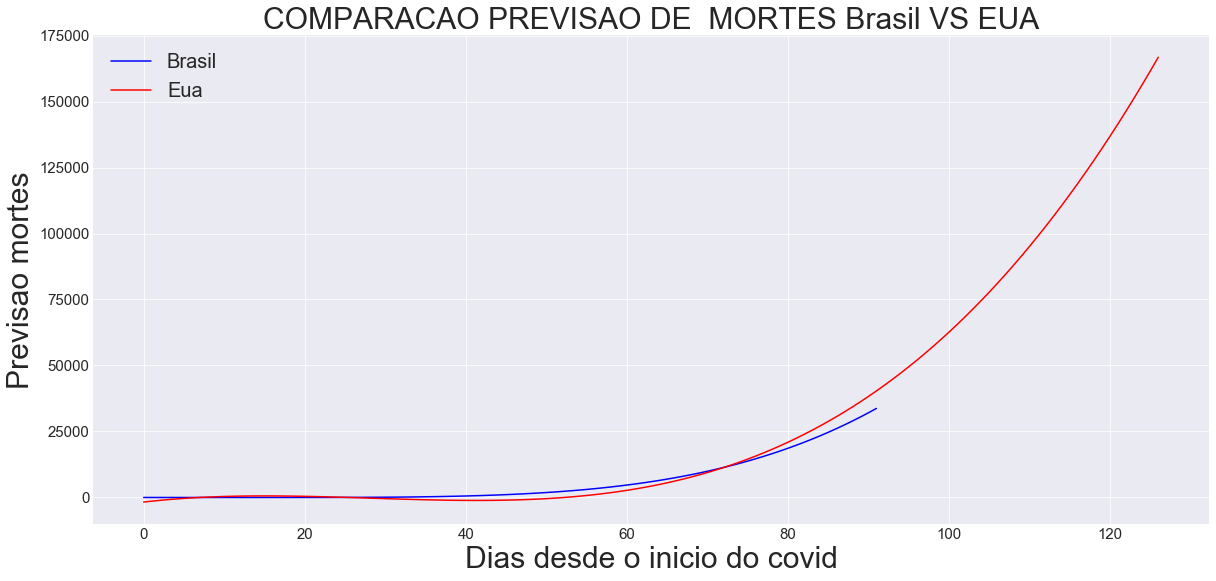

In [0]:
plt.figure(figsize=(20, 9))
plt.plot(futuro_brasil, pred_mortes_br, color='blue')
plt.plot(futuro_eua, pred_mortes_eua, color='red')

plt.title('COMPARACAO PREVISAO DE  MORTES Brasil VS EUA', size=30)
plt.xlabel('Dias desde o inicio do covid', size = 30)
plt.ylabel('Previsao mortes', size = 30)
plt.legend(['Brasil', 'Eua'],  prop={'size': 20}, loc="upper left")


plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


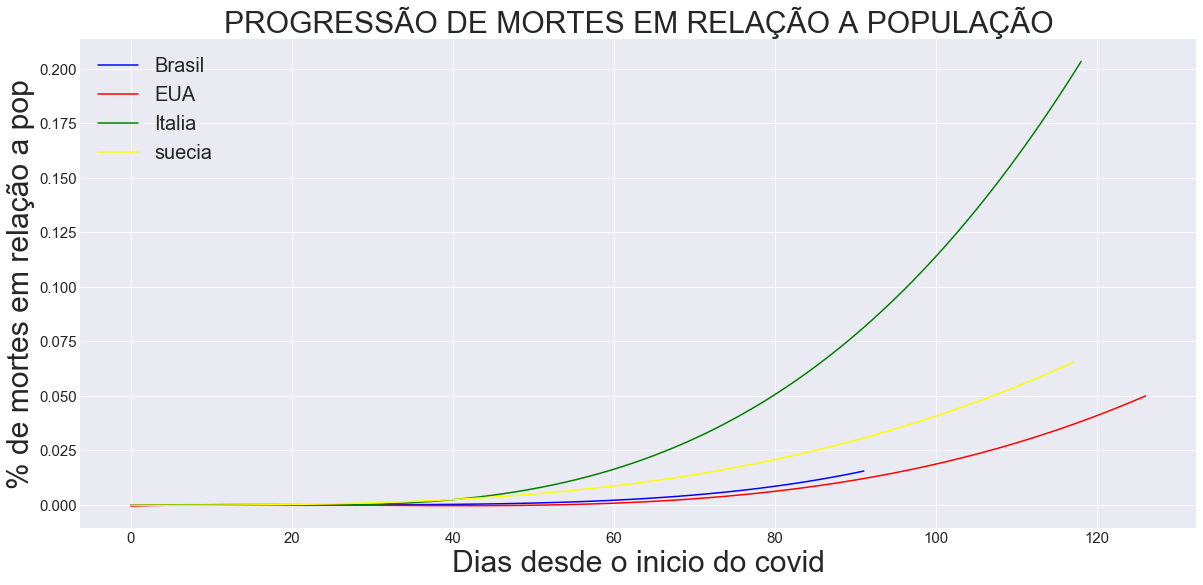

In [0]:
eua_porc = []
br_porc = []
it_porc = []
su_porc = []

for i in pred_mortes_eua:
  porc = (i / 333545145)*100
  eua_porc.append(porc)
for i in pred_mortes_br:
  porc = (i / 217089238)*100
  br_porc.append(porc)
for i in pred_mortes_italia:
  porc = (i / 60017348)*100
  it_porc.append(porc)
for i in pred_mortes_suecia:
  porc = (i / 10174790)*100
  su_porc.append(porc)

plt.figure(figsize=(20, 9))
plt.plot(futuro_brasil, br_porc, color='blue')
plt.plot(futuro_eua, eua_porc, color='red')
plt.plot(futuro_italia, it_porc, color='green')
plt.plot(futuro_suecia, su_porc, color='yellow')

plt.title('PROGRESSÃO DE MORTES EM RELAÇÃO A POPULAÇÃO', size=30)
plt.xlabel('Dias desde o inicio do covid', size = 30)
plt.ylabel('% de mortes em relação a pop', size = 30)
plt.legend(['Brasil', 'EUA','Italia', 'suecia'],  prop={'size': 20}, loc="upper left")


plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


# Sobre Mim

Olá, sou Lucas Marchiori e atualmente(04/2020) estou cursando o 3º semestre de Engenharia de Computação na Universidade Federal de São Carlos (UFSCar), e me encontro no ramo da computação desde o ensino médio, onde fiz tecnico em informatica na Etec de Nova Odessa.

Apesar de estar na area de computação a um bom tempo ja, eu só fui me encontrar na area de ciencia de dados recentemente,tanto que esse é meu primeiro projeto nessa area, onde resolvi usar o tempo livre da quarentena para aprender um pouco dessa area tão vasta que vem me interessando cada vez mais.

Atualmente venho procurando estudar mais  sobre ciencia de dados, machine learning e suas "sub divisões"

Algus links:

Meu github: https://bit.ly/GitLucas    
Meu Linkedin: https://bit.ly/2XJR5Z0
